<a href="https://colab.research.google.com/github/hugocfrias/hugocfrias-MVP/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP: Análise de Dados e Boas Práticas**

**Título:** Análise base de dados 'Mental Health Lifestyle'

**Nome:** Hugo Coelho de Frias

**Matrícula:** 4052025000248

**Linkedin:** https://www.linkedin.com/in/hugo-frias-7059b622/

**E-mail:** hugofrias2@hotmail.com

Dataset: [Mental_Health_Lifestyle](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


Link DataBase GitHub Raw : https://raw.githubusercontent.com/hugocfrias/hugocfrias-MVP/refs/heads/main/Mental_Health_Lifestyle_Dataset.csv




# 1. Descrição do Problema

O Conjunto de Dados de '**Mental Health and Lifestyle Habits Dataset (2019-2024)**' é uma coleção abrangente de dados que visa compreender como diversos fatores de estilo de vida afetam o bem-estar mental. Esta base de dados captura aspectos como rotinas de exercícios, hábitos alimentares, padrões de sono, níveis de estresse e interações sociais, além de informações demográficas.

O objetivo é identificar 'níveis de stress e bem-estar' de acordo com hábitos do cotidiano.


## 1.1. Hipóteses do Problema

Hipóteses levantadas:

1. Podemos segregar os diferentes níveis de stress e bem-estar de acordo com as aferições de horas de sono, horas de trabalho e horas em telas diários, por exemplo?

2. Existe alguma correlação entre os atributos numéricos (exemplo: horas de sonos e horas trabalhadas)?

3. Há algum padrão facilmente de ser identificado apenas com uma análise gráfica?

4. Premissas: De maneira empírica, pela natureza dos atributos do dataset original, creio que há uma correlação entre alguns desses atributos (exemplos: horas de sono vs horas trabalhadas / horas de sono vs horas de tela).


## 1.2. Tipo de Problema

O problema foi identificado como do tipo de **classificação supervisionada**. De acordo com os atributos numéricos (horas de sono, horas trabalhadas, idade, score de felididade etc), o objetivo é a previsão dos '**níveis de stress**' e  bem-estar' dos indivíduos.

## 1.3. Seleção de Dados

O dataset '**Mental Health Lifestyle**' foi coletado de acordo com as orientações do guia do MVP.

Fonte: https://www.kaggle.com/datasets.

## 1.4. Atributos do Dataset

O dataset '**Mental Health Lifestyle**' possui 3000 instâncias, de maneira balanceada em relação aos atributos categóricos (Países, Gêneros, Tipo de Dieta etc). No total, possui 12 atributos:

---
1. Country:	País do respondente (Australia, Brazil, Canada, Germany, India, Japan, USA)
2. Age: Idade do respondente (Anos)
3. Gender:	Identidade de gênero do respondente (Female, Male, Other)
4. Exercise Level: Nível de exercício físico do respondente (High, Low, Moderate)
5. Diet Type:	Classificação da dieta do respondente (Balanced, Junk Food, Keto, Vegan, Vegetarian)
6. Sleep Hours:	Horas de sono diária do respondente (Horas)
7. Stress Level: Nível de stress do respondente (High, Low, Moderate)
8. Mental Health Condition: Condição de saúde mental do respondente (Anxiety, Bipolar, Depression, None, PTSD)
9. Work Hours per Week: Horas de trabalho diária do respondente (Horas)
10. Screen Time per Day: Tempo de tela diária do respondente (Horas)
11. Social Interaction Score: Pontuação de interação Social do respondente (Escala 1-10)
12. Happiness Score: Pontuação de Felicidade do respondente (Escala 1-10)
---






# 2. Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados. Também demonstra o carregamento do dataset **'Mental Health Lifestyle'**.


*Observações Iniciais Importações e Carga de Dados*


---


Além da importação das bibliotecas pandas, numpy, matplotlib e seaborn, realizei  importação das paletas de cores 'viridis' e 'inferno'. O objetivo é uma melhor visualização dos gráficos que virão a seguir.


---



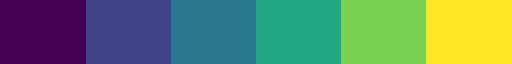

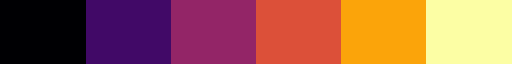

In [26]:
# Imports de Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Importação das Paletas de Cores
paleta1 = plt.get_cmap("viridis", 6)
paleta2 = plt.get_cmap("inferno", 6)

# exibição do mapa de cores
display(paleta1)
display(paleta2)

# importação dos dados uma url para um dataframe

url_dados = 'https://raw.githubusercontent.com/hugocfrias/hugocfrias-MVP/refs/heads/main/Mental_Health_Lifestyle_Dataset.csv'

# Carga do dataset através da url
Mental_Health_Lifestyle = pd.read_csv(url_dados)

**O teste abaixo evidencia que a carga de dados que iremos trabalhar é um
dataframe**

In [27]:
# Verificando que 'Mental_Health_Lifestyle' é um dataframe
type(Mental_Health_Lifestyle)

pandas.core.frame.DataFrame

**Descrição do tipo de cada atributo do dataframe a ser analisado**

In [28]:
# Verificando os tipos de cada coluna do dataframe
Mental_Health_Lifestyle.dtypes

Country                         object
Age                              int64
Gender                          object
Exercise Level                  object
Diet Type                       object
Sleep Hours                    float64
Stress Level                    object
Mental Health Condition         object
Work Hours per Week              int64
Screen Time per Day (Hours)    float64
Social Interaction Score       float64
Happiness Score                float64
dtype: object

>**Exebição das primeiras linhas do dataframe (Mental_Health_Lifestyle)**

In [29]:
# Exibição as primeiras linhas
Mental_Health_Lifestyle.head()

Country  Age  Gender Exercise Level   Diet Type  Sleep Hours  \
0     Brazil   48    Male            Low  Vegetarian          6.3   
1  Australia   31    Male       Moderate       Vegan          4.9   
2      Japan   37  Female            Low  Vegetarian          7.2   
3     Brazil   35    Male            Low       Vegan          7.2   
4    Germany   46    Male            Low    Balanced          7.3   

  Stress Level Mental Health Condition  Work Hours per Week  \
0          Low                     NaN                   21   
1          Low                    PTSD                   48   
2         High                     NaN                   43   
3          Low              Depression                   43   
4          Low                 Anxiety                   35   

   Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
0                          4.0                       7.8              6.5  
1                          5.2                       8.2              6.8  
2                          4.7                       9.6              9.7  
3                          2.2                       8.2              6.6  
4                          3.6                       4.7              4.4

>**Com o objetivo de facilitar as próximas análises, realizei uma reordenação dos atributos. Nesse caso, iniciando o dataframe (df) com os atributos categóricos e, posteriormente, os atributos núméricos**




In [30]:
# Reordenação das colunas com o objetivo de iniciar o df com os atributos categóricos
new_order = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition', 'Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score' ]
df = Mental_Health_Lifestyle[new_order]

In [31]:
# Exibição as primeiras linhas do df reordenado
df.head()

Country  Gender Exercise Level   Diet Type Stress Level  \
0     Brazil    Male            Low  Vegetarian          Low   
1  Australia    Male       Moderate       Vegan          Low   
2      Japan  Female            Low  Vegetarian         High   
3     Brazil    Male            Low       Vegan          Low   
4    Germany    Male            Low    Balanced          Low   

  Mental Health Condition  Age  Sleep Hours  Work Hours per Week  \
0                     NaN   48          6.3                   21   
1                    PTSD   31          4.9                   48   
2                     NaN   37          7.2                   43   
3              Depression   35          7.2                   43   
4                 Anxiety   46          7.3                   35   

   Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
0                          4.0                       7.8              6.5  
1                          5.2                       8.2              6.8  
2                          4.7                       9.6              9.7  
3                          2.2                       8.2              6.6  
4                          3.6                       4.7              4.4

### *Comentários Importações e Carga de Dados*


---


>Após o carregamento dos dados diretamente do link do GitHub (Raw), os testes realizados demonstram que a carga foi realizada com sucesso. Dos 12 atributos, 6 são do tipo 'object', 2 são do tipo 'int' e 4 são do tipo 'float'. Realizei também uma reordenação das colunas com objetivo de iniciar o dataframe com os atributos categóricos.


---



# 3. Análise de Dados

Nesta etapa de Análise de Dados Exploratória, visamos entender a distribuição, as relações e as características das variáveis do dataframe 'df'.

## 3.1. Total e Tipo das Instâncias

*Observações Iniciais Total e Tipo de Instâncias*


---


Trata-se de um dataset com 3000 instâncias (observações) e 12 atributos. Estes 12 atributos (características) de medição são de tipo numérico (float), inteiros (int) e categóricos (object).


---



In [32]:
#Resumo para primeira análise dos dados importados
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 3000

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Gender                       3000 non-null   object 
 2   Exercise Level               3000 non-null   object 
 3   Diet Type                    3000 non-null   object 
 4   Stress Level                 3000 non-null   object 
 5   Mental Health Condition      2405 non-null   object 
 6   Age                          3000 non-null   int64  
 7   Sleep Hours                  3000 non-null   float64
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2

>**Análise de balanceamento do atributo categórico 'Gênero'**

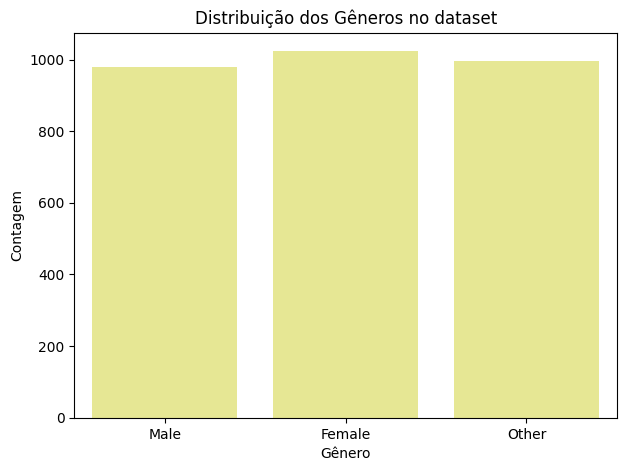

In [33]:
#Exemplo 1 de balenceamento das variáveis categóricas (Gênero).
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Gender', data=df, color='#f3f586')
plt.title('Distribuição dos Gêneros no dataset')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

>**Análise de balanceamento do atributo categórico 'Países'**

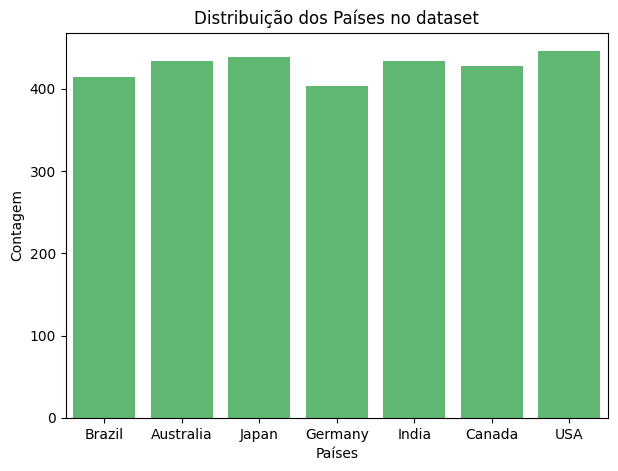

In [34]:
#Exemplo 2 de balenceamento das variáveis categóricas (Países).
plt.figure(figsize=(7, 5))
# gráfico de barras simples
sns.countplot(x='Country', data=df, color='#52c569')
plt.title('Distribuição dos Países no dataset')
plt.xlabel('Países')
plt.ylabel('Contagem')
plt.show()

*Comentários Total e Tipo de Instâncias:*


---


>Os gráficos de barras acima mostram que o dataset é balanceado em relação às classes 'Gênero' e 'Países'. Estes atributos foram utilizados como exemplos, porém os demais têm o mesmo comportamento. Esse balanceamento é essencial para que um modelo construído a partir desses dados não desfavoreça algum tipo dessas classes.


---



## 3.2. Estatísticas Descritivas

*Observações Iniciais Estatísticas Descritivas*


---


Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.


---



In [35]:
# Estatísticas descritivas básicas do dataset
df.describe()

Age  Sleep Hours  Work Hours per Week  \
count  3000.000000  3000.000000          3000.000000   
mean     41.229667     6.475933            39.466333   
std      13.428416     1.499866            11.451459   
min      18.000000     1.400000            20.000000   
25%      30.000000     5.500000            30.000000   
50%      41.000000     6.500000            39.000000   
75%      53.000000     7.500000            50.000000   
max      64.000000    11.300000            59.000000   

       Screen Time per Day (Hours)  Social Interaction Score  Happiness Score  
count                  3000.000000               3000.000000      3000.000000  
mean                      5.089833                  5.470200         5.395067  
std                       1.747231                  2.563532         2.557601  
min                       2.000000                  1.000000         1.000000  
25%                       3.600000                  3.300000         3.200000  
50%                       5.100000                  5.500000         5.400000  
75%                       6.600000                  7.600000         7.500000  
max                       8.000000                 10.000000        10.000000

### Média e Desvio Padrão

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [36]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

Age                            41.229667
Sleep Hours                     6.475933
Work Hours per Week            39.466333
Screen Time per Day (Hours)     5.089833
Social Interaction Score        5.470200
Happiness Score                 5.395067
Name: mean, dtype: float64

In [37]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

Age                            13.428416
Sleep Hours                     1.499866
Work Hours per Week            11.451459
Screen Time per Day (Hours)     1.747231
Social Interaction Score        2.563532
Happiness Score                 2.557601
Name: std, dtype: float64

>**Nesta etapa, foi pesquisado um método de demostração gráfica da média e dos desvios padrões dos atributos numéricos. O gráfico a seguir possuiu as barras com as médias e as barras de erro.**

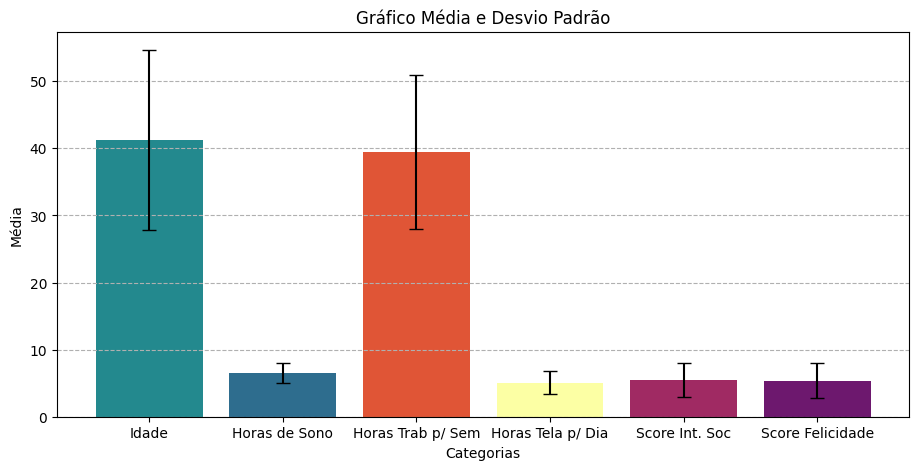

In [38]:
# Criação das variáveis para a construção do gráfico de barra da Média e do Desvio Padrão
categorias = ["Idade", "Horas de Sono","Horas Trab p/ Sem","Horas Tela p/ Dia","Score Int. Soc","Score Felicidade"]
meanchart = [df['Age'].mean(),df['Sleep Hours'].mean(),df['Work Hours per Week'].mean(),df['Screen Time per Day (Hours)'].mean(),df['Social Interaction Score'].mean(),df['Happiness Score'].mean()]
stdchart = [df['Age'].std(),df['Sleep Hours'].std(),df['Work Hours per Week'].std(),df['Screen Time per Day (Hours)'].std(),df['Social Interaction Score'].std(),df['Happiness Score'].std()]

# Criação do gráfico de barras
plt.figure(figsize=(11, 5))
plt.bar(categorias, meanchart, yerr=stdchart, capsize=5, color=['#23898e','#2e6d8e','#e05536','#fcffa4','#a02a63','#6d186e'], label='Valores com Erro')

# Adicionando títulos e rótulos
plt.xlabel('Categorias')
plt.ylabel('Média')
plt.title('Gráfico Média e Desvio Padrão')
plt.grid(axis='y', linestyle='--')
plt.show()

*Comentários Estatística Descritiva:*


---


> Primeiramente, foi apresentado um quadro de informações básicas (média, desvio padrão, percentis etc) em relação aos atributos numéricos;

> Foi criado um '**gráfico de barras com barras de erro**' que inclui as médias e os desvios padrões dos atributos numéricos. Podemos visualizar a proporção do desvio em relação à média de cada um destes atributos numéricos. Proporcionalmente às médias, considero que os desvios são altos para todos os atributos.



---



## 3.3. Histograma

*Observações Iniciais Histograma*


---


A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.


---



**Histograma dos atributos numéricos**


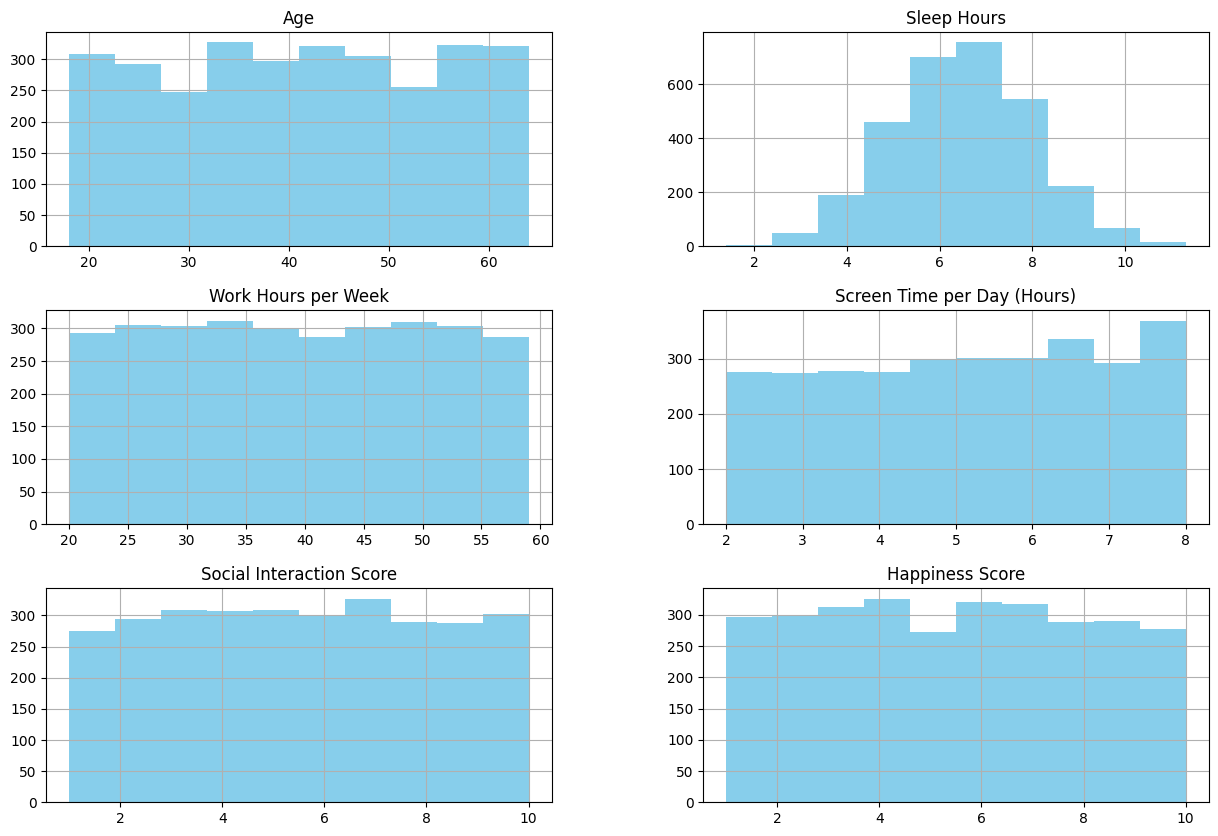

In [39]:
# Histogramas Variáveis Categóricas
df.hist(figsize = (15,10),color='skyblue',grid=1)
plt.show()

Podemos analisar que o atributo 'Horas de Sono' é o único com uma distribuição normal. Sendo os demais, distribuições uniformes.

**Densidade dos atributos numéricos**

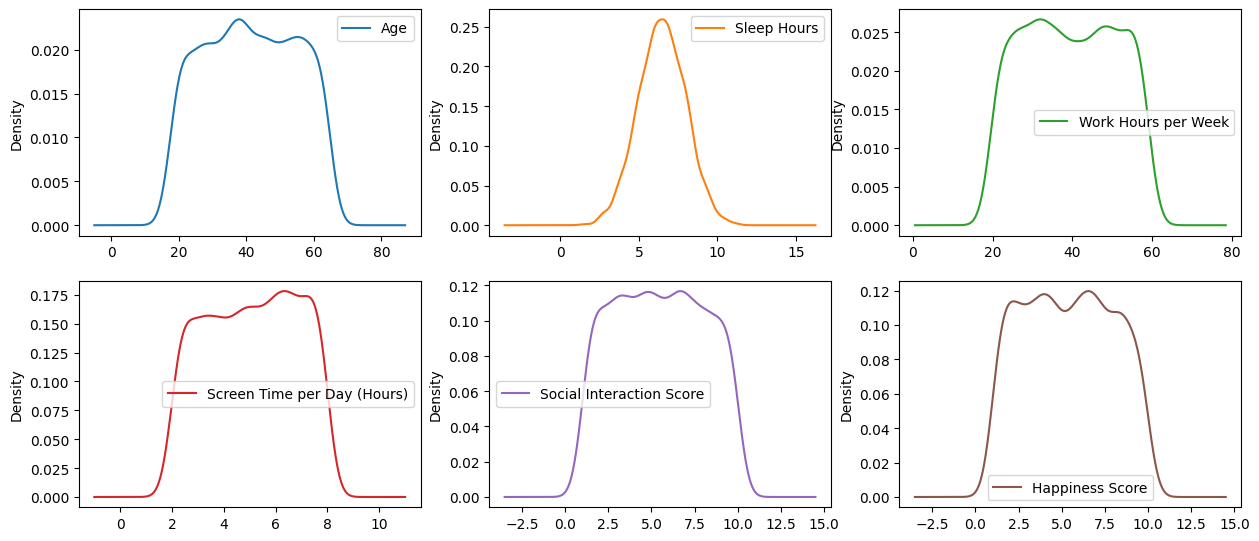

In [40]:
# Densidade Variáveis Numéricas
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

As densidade confiram as análises dos histogramas. O 'formato de sino' do atributo 'Horas de Sono' demonstra sua distribuição normal.

**Histograma do atributo 'Horas de Sono' com 'Kde'**

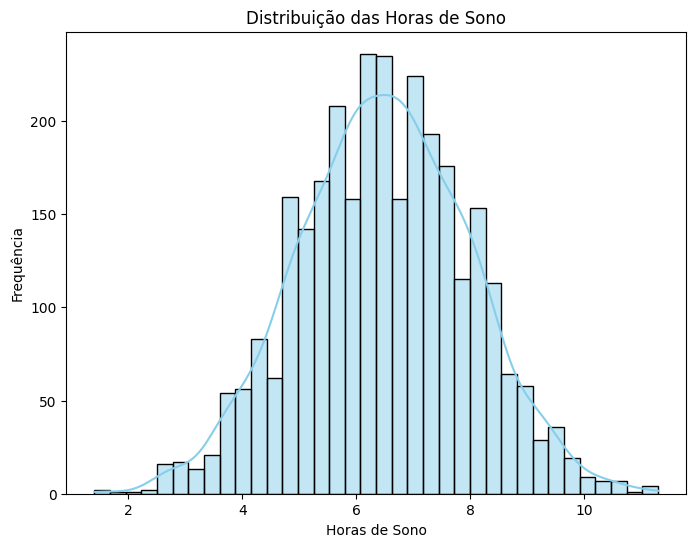

In [41]:
# Histograma Horas de Sono (Estimativa de Densidade de Kernel)
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Hours'], color='skyblue', kde=True)
plt.title('Distribuição das Horas de Sono')
plt.xlabel('Horas de Sono')
plt.ylabel('Frequência')
plt.show()

Distribuição normal do atributo 'Hora de Sono'

**Histograma do atributo 'Idade' com 'Kde'**

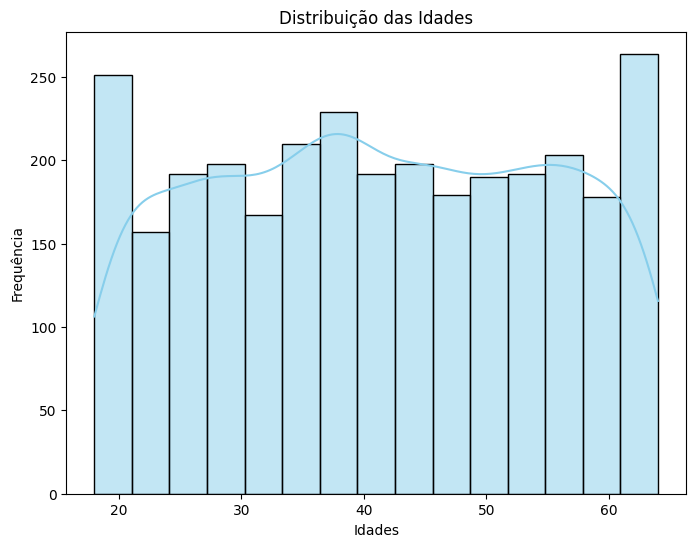

In [42]:
# Histograma Idades (Estimativa de Densidade de Kernel)
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], color='skyblue',kde=True)
plt.title('Distribuição das Idades')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.show()

Distribuição uniforme do atributo 'Idade'

**Histograma do atributo 'Score Felicidade' com 'Kde'**

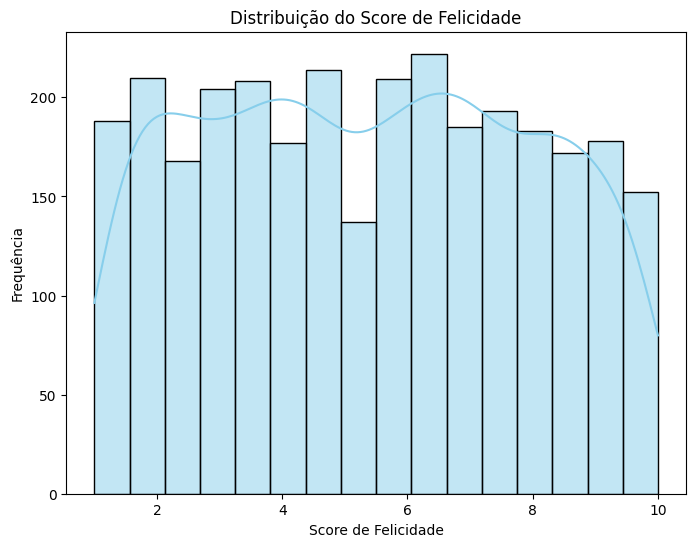

In [43]:
# Histograma Score Felicidade (Estimativa de Densidade de Kernel)
plt.figure(figsize=(8, 6))
sns.histplot(df['Happiness Score'], color='skyblue',kde=True)
plt.title('Distribuição do Score de Felicidade')
plt.xlabel('Score de Felicidade')
plt.ylabel('Frequência')
plt.show()

Distribuição uniforme do atributo 'Score Felicidade'

*Comentários Histogramas:*


---


> Primeiramente, foram apresentados de maneira isolada os histogramas e as densidades de cada atributo numérico;

> Posteriormente, foram criados histogramas para os atributos 'Horas de Sono', 'Idades' e 'Score Felicidade' incluindo a 'Estimativa de Densidade de Kernel;

> Dentre todas, podemos observar que apenas o atributo 'Horas de Sono' tem um comportamento de distribuição normal.


---




## 3.4. Boxplot

*Observações Iniciais Boxplot*


---


Para entender as diferenças entre os atributos categóricos, devemos olhar como se comportam os valores quando agrupados. Isso nos permite comparar a média, mediana e desvio padrão.


---



**Boxplots dos atributos numéricos**

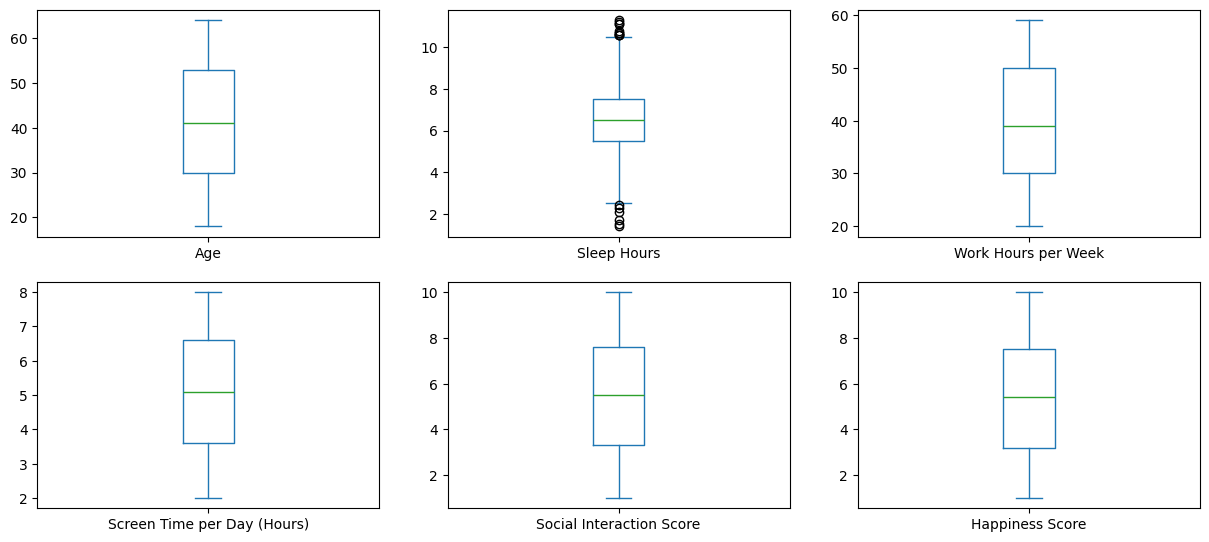

In [44]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Com uma análise inicial dos boxplots, se destacam os outliers do atributo 'Horas de Sono'

### *3.4.1. Nível de Stress*


**Aprofundamento das análises via Boxplot de utilizando como base o atributo 'Nível de Stress'**

In [46]:
# Estatísticas descritivas agrupadas Nível de Exercício Físico
df.groupby('Stress Level').describe()

Age                                                       \
               count       mean        std   min    25%   50%   75%   max   
Stress Level                                                                
High          1002.0  41.408184  13.712040  18.0  30.00  41.0  54.0  64.0   
Low           1008.0  40.852183  13.321290  18.0  29.75  41.0  52.0  64.0   
Moderate       990.0  41.433333  13.251213  18.0  30.00  42.0  53.0  64.0   

             Sleep Hours            ... Social Interaction Score        \
                   count      mean  ...                      75%   max   
Stress Level                        ...                                  
High              1002.0  6.494212  ...                      7.6  10.0   
Low               1008.0  6.451091  ...                      7.7  10.0   
Moderate           990.0  6.482727  ...                      7.5  10.0   

             Happiness Score                                                
                       count      mean       std  min  25%  50%  75%   max  
Stress Level                                                                
High                  1002.0  5.440419  2.547764  1.0  3.3  5.4  7.6  10.0  
Low                   1008.0  5.408631  2.606800  1.0  3.1  5.5  7.6  10.0  
Moderate               990.0  5.335354  2.518101  1.0  3.2  5.4  7.4  10.0  

[3 rows x 48 columns]

Horas de Sono por Nível de Stress

---



**Boxplot do atributo 'Horas de sono' de cada 'Nível de Stress' do dataframe**

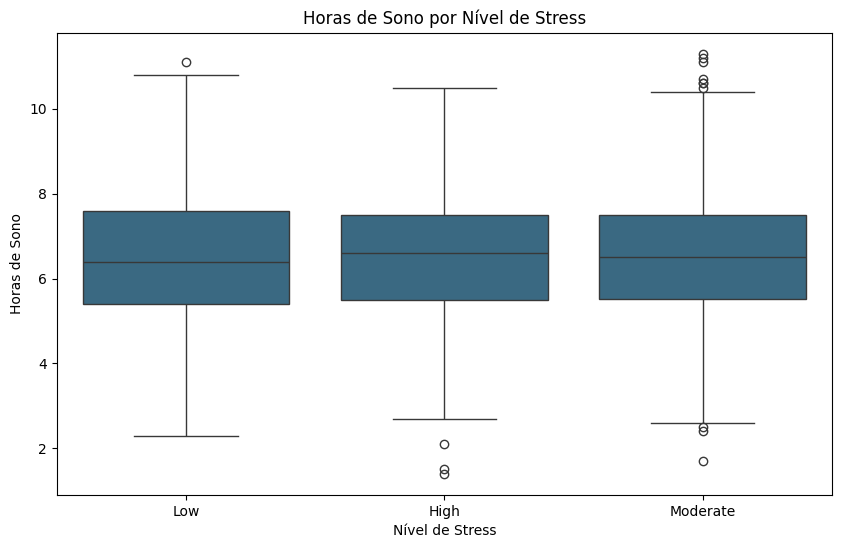

In [47]:
# Boxplot Horas de Sono por Nível de Stress
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Sleep Hours', color='#2e6d8e',data=df)
plt.title('Horas de Sono por Nível de Stress')
plt.xlabel('Nível de Stress')
plt.ylabel('Horas de Sono')
plt.show()

Idade por Nível de Stress

---



**Boxplot do atributo 'Idade' de cada 'Nível de Stress' do dataframe**

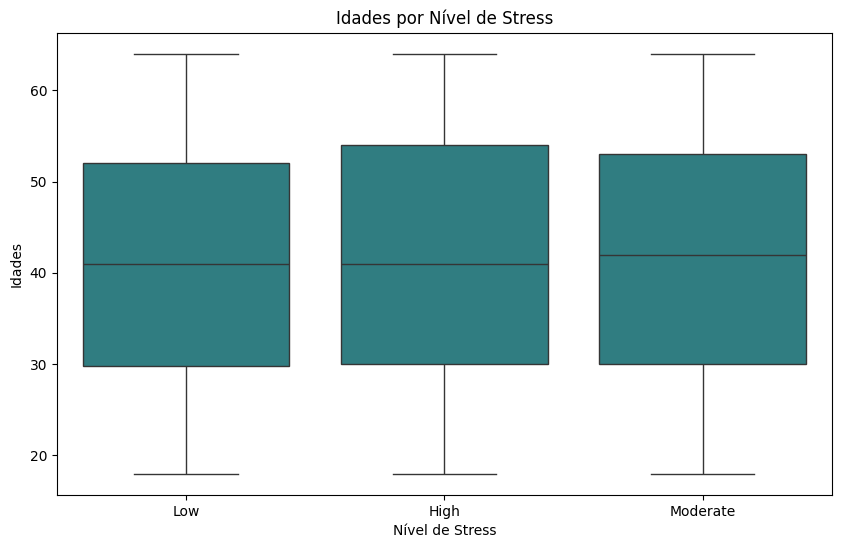

In [48]:
# Boxplot Idades por Nível de Stress
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Age', color='#23898e',data=df)
plt.title('Idades por Nível de Stress')
plt.xlabel('Nível de Stress')
plt.ylabel('Idades')
plt.show()

Score de Felicidade por Nível de Stress

---



**Boxplot do atributo 'Score Felicidade' de cada 'Nível de Stress' do dataframe**

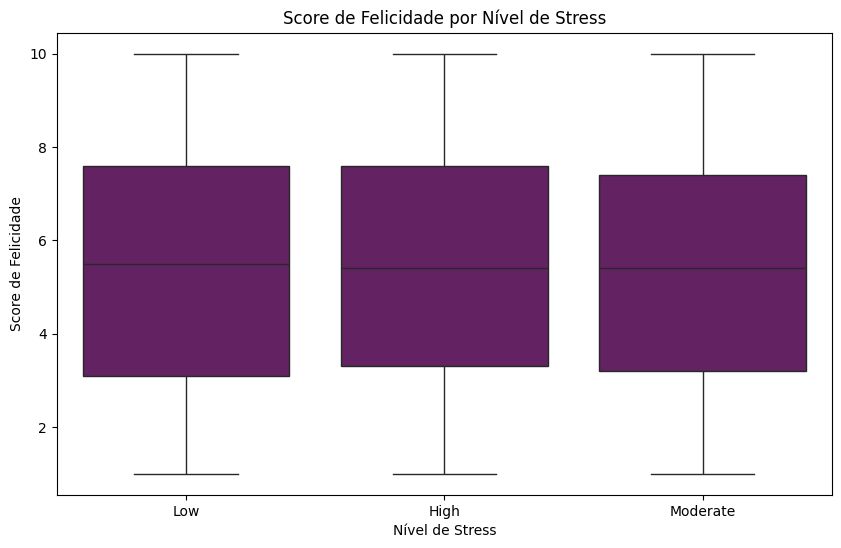

In [49]:
# # Boxplot Score de Felicidade por Nível de Stress
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Happiness Score', color='#6d186e',data=df)
plt.title('Score de Felicidade por Nível de Stress')
plt.xlabel('Nível de Stress')
plt.ylabel('Score de Felicidade')
plt.show()

### *3.4.2. Países*


**Aprofundamento das análises via Boxplot de utilizando como base o atributo 'País'**

In [50]:
# Estatísticas descritivas agrupadas Países
df.groupby('Country').describe()

Age                                                      \
           count       mean        std   min   25%   50%   75%   max   
Country                                                                
Australia  434.0  42.182028  13.586318  18.0  31.0  42.5  54.0  64.0   
Brazil     415.0  41.009639  13.164324  18.0  30.0  41.0  52.0  64.0   
Canada     428.0  40.387850  13.485669  18.0  29.0  41.0  52.0  64.0   
Germany    404.0  40.928218  13.386683  18.0  29.0  41.0  52.0  64.0   
India      434.0  40.794931  13.569320  18.0  29.0  39.0  53.0  64.0   
Japan      439.0  41.936219  13.738276  18.0  30.0  42.0  54.0  64.0   
USA        446.0  41.316143  13.050156  18.0  32.0  41.0  52.0  64.0   

          Sleep Hours            ... Social Interaction Score        \
                count      mean  ...                      75%   max   
Country                          ...                                  
Australia       434.0  6.411982  ...                      7.4   9.8   
Brazil          415.0  6.446024  ...                      7.8  10.0   
Canada          428.0  6.555607  ...                      7.9  10.0   
Germany         404.0  6.285644  ...                      7.7  10.0   
India           434.0  6.540783  ...                      7.4  10.0   
Japan           439.0  6.552164  ...                      7.8  10.0   
USA             446.0  6.523767  ...                      7.5  10.0   

          Happiness Score                                                     
                    count      mean       std  min    25%   50%    75%   max  
Country                                                                       
Australia           434.0  5.494240  2.591332  1.0  3.225  5.60  7.600  10.0  
Brazil              415.0  5.335904  2.598845  1.0  3.100  5.10  7.550  10.0  
Canada              428.0  5.559112  2.535516  1.0  3.375  5.85  7.600  10.0  
Germany             404.0  5.368069  2.411880  1.0  3.400  5.35  7.325   9.9  
India               434.0  5.378802  2.623779  1.1  3.000  5.30  7.600  10.0  
Japan               439.0  5.279271  2.529543  1.0  3.100  5.20  7.400  10.0  
USA                 446.0  5.350448  2.603530  1.0  3.100  5.40  7.500   9.9  

[7 rows x 48 columns]

Horas de Sono por País

---



**Boxplot do atributo 'Horas de Sono' de cada 'País' do dataframe**

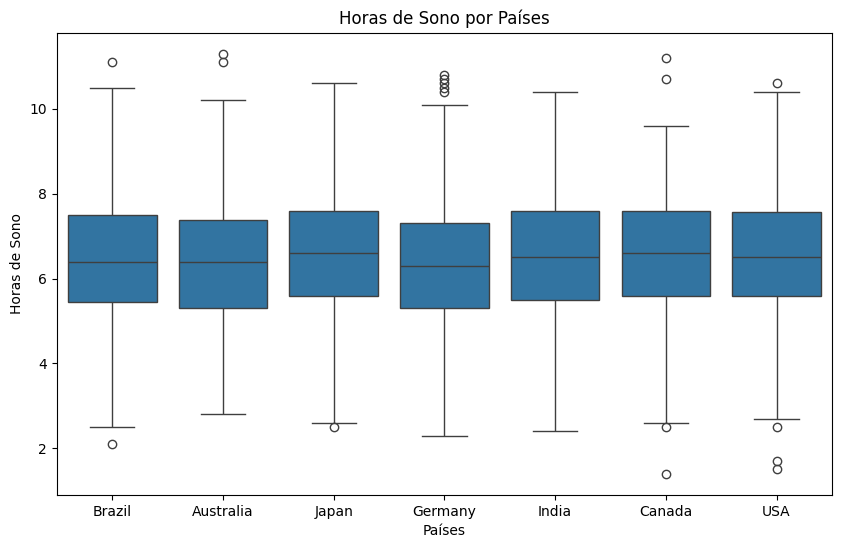

In [51]:
# Boxplot Horas de Sono por Países
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Sleep Hours', data=df)
plt.title('Horas de Sono por Países')
plt.xlabel('Países')
plt.ylabel('Horas de Sono')
plt.show()

Idade por País

---



**Boxplot do atributo 'Idade' de cada 'País' do dataframe**

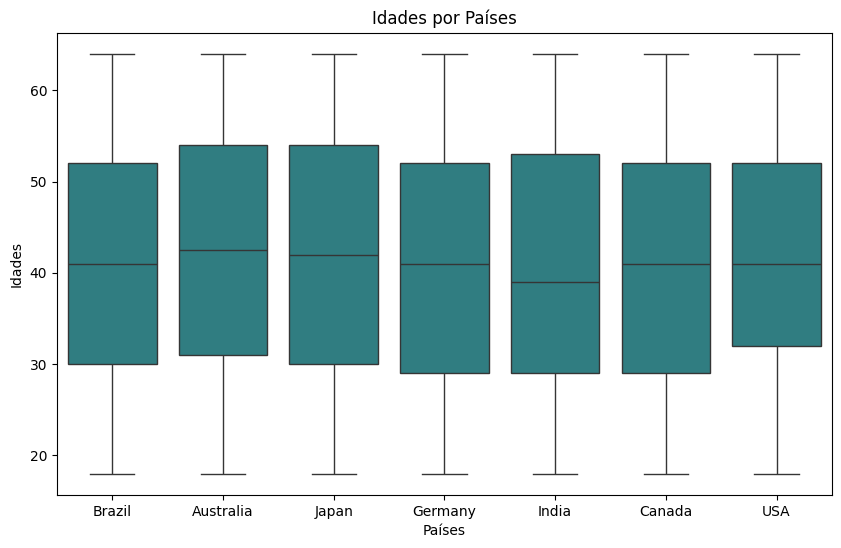

In [52]:
# Boxplot Idades por Países
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Age', color='#23898e',data=df)
plt.title('Idades por Países')
plt.xlabel('Países')
plt.ylabel('Idades')
plt.show()

Score de Felicidade por País

---



**Boxplot do atributo 'Score Felicidade' de cada 'País' do dataframe**

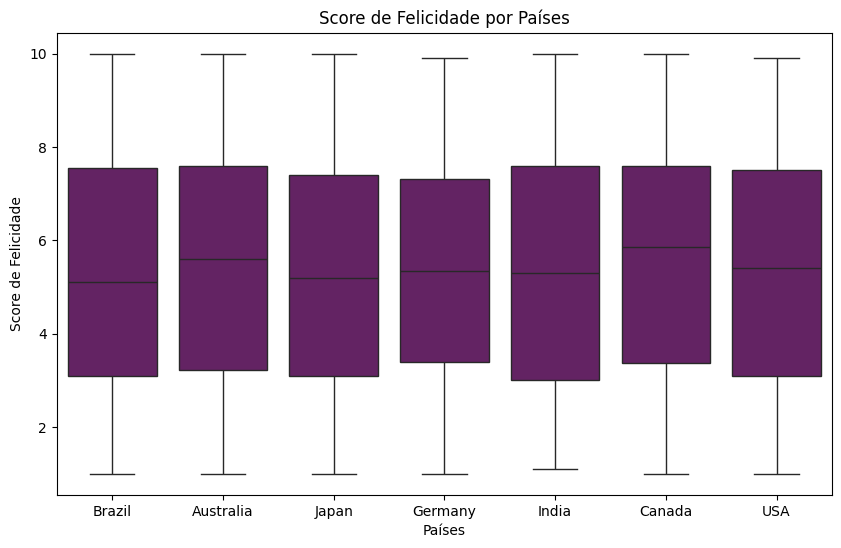

In [53]:
# # Boxplot Score de Felicidade por Países
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Happiness Score', color='#6d186e', data=df)
plt.title('Score de Felicidade por Países')
plt.xlabel('Países')
plt.ylabel('Score de Felicidade')
plt.show()

### *3.4.3. Gênero*


**Aprofundamento das análises via Boxplot de utilizando como base o atributo 'Gênero'**

In [54]:
# Estatísticas descritivas agrupadas Gênero
df.groupby('Gender').describe()

Age                                                      \
         count       mean        std   min   25%   50%   75%   max   
Gender                                                               
Female  1024.0  40.769531  13.262137  18.0  29.0  40.0  52.0  64.0   
Male     980.0  41.550000  13.595294  18.0  30.0  42.0  53.0  64.0   
Other    996.0  41.387550  13.433791  18.0  30.0  41.0  53.0  64.0   

       Sleep Hours            ... Social Interaction Score        \
             count      mean  ...                      75%   max   
Gender                        ...                                  
Female      1024.0  6.521582  ...                      7.5  10.0   
Male         980.0  6.445918  ...                      7.7  10.0   
Other        996.0  6.458534  ...                      7.6  10.0   

       Happiness Score                                                  
                 count      mean       std  min  25%  50%    75%   max  
Gender                                                                  
Female          1024.0  5.287109  2.607559  1.0  3.0  5.3  7.525  10.0  
Male             980.0  5.474592  2.508310  1.0  3.4  5.5  7.500  10.0  
Other            996.0  5.427811  2.552559  1.0  3.2  5.5  7.500  10.0  

[3 rows x 48 columns]

Horas de Sono por Gênero

---



**Boxplot do atributo 'Horas de Sono' de cada 'Gênero' do dataframe**

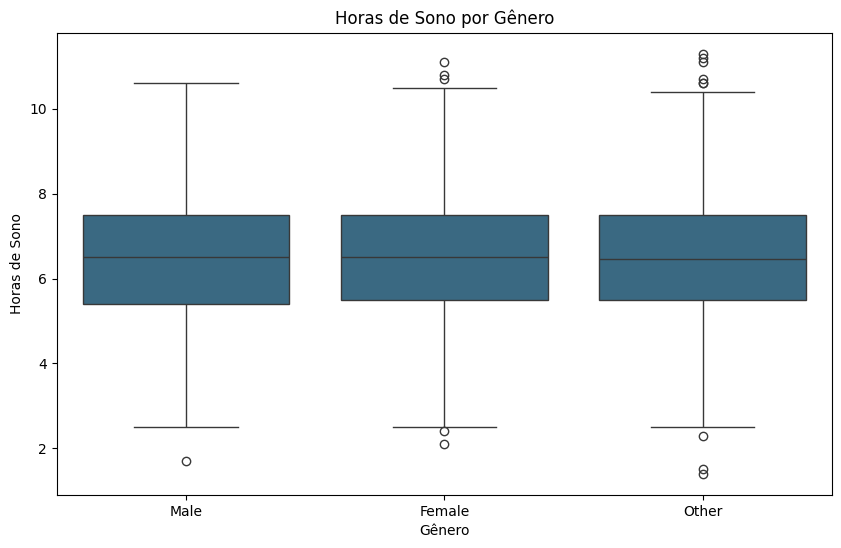

In [55]:
# Boxplot Horas de Sono por Gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Sleep Hours', color='#2e6d8e', data=df)
plt.title('Horas de Sono por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Horas de Sono')
plt.show()

Idade por Gênero

---



**Boxplot do atributo 'Idade' de cada 'Gênero' do dataframe**

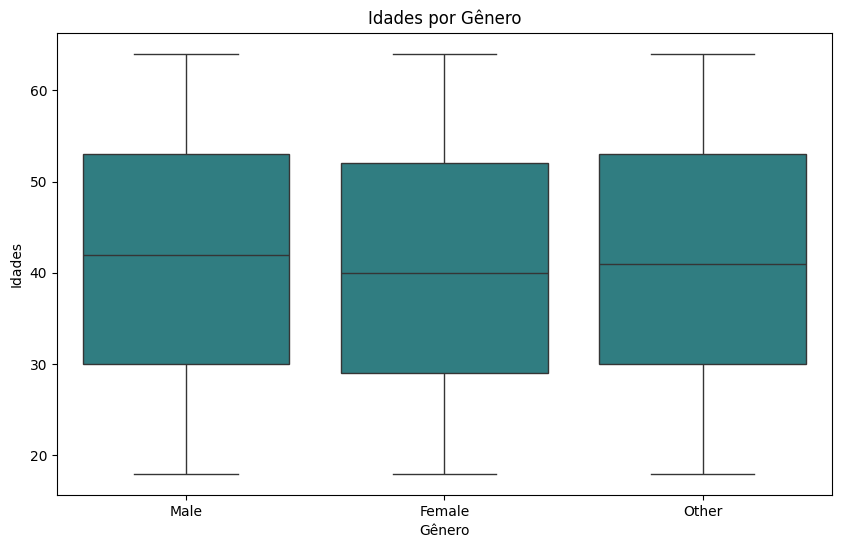

In [56]:
# Boxplot Idades por Gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', color ='#23898e', data=df)
plt.title('Idades por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idades')
plt.show()

Score de Felicidade por Gênero

---



**Boxplot do atributo 'Score Felicidade' de cada 'Gênero' do dataframe**

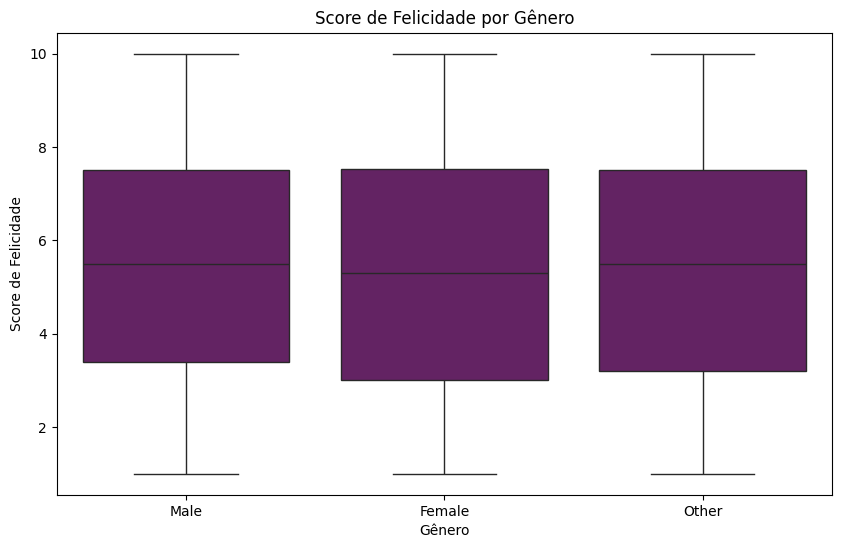

In [57]:
# Boxplot Score de Felicidade por Gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Happiness Score', color='#6d186e',data=df)
plt.title('Score de Felicidade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Score de Felicidade')
plt.show()

### *Comentários Boxplots*:


---


> Inicialmente, foi apresentados os Boxplots de todos os atributos numéricos;

> Posteriormente, foram criados exemplos de Boxplots de variáveis numéricas com os membros de atributos categóricos no eixo x (Exemplo: Horas de Sono por Nível de Stress). O objetivo foi entender se havia alguma diferença notável entres estes membros dos atributos categóricos analisados;

> Concluímos que não há diferenças notáveis entre estes atributos categóricos analisados (Exemplo: Horas de Sono por Nível de Stress). Percebemos, por exemplo, a sobreposição das caixas e o alinhamento das medianas.


---



## 3.5. Matriz de Correlação, Pair Plor e Scatterplot


*Observações Iniciais Matriz de Correlação*


---


A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.


---



**Trata-se da matriz de correlação sem nenhum tipo de tratamento dos dados**

In [58]:
# Matriz de correlação df
print("\nMatriz de Correlação:")
df.iloc[:,6:13].corr()


Matriz de Correlação:


Age  Sleep Hours  Work Hours per Week  \
Age                          1.000000    -0.016577            -0.000838   
Sleep Hours                 -0.016577     1.000000             0.011071   
Work Hours per Week         -0.000838     0.011071             1.000000   
Screen Time per Day (Hours) -0.004954     0.022550            -0.020283   
Social Interaction Score    -0.043870    -0.005222             0.015009   
Happiness Score             -0.015862     0.017389             0.010837   

                             Screen Time per Day (Hours)  \
Age                                            -0.004954   
Sleep Hours                                     0.022550   
Work Hours per Week                            -0.020283   
Screen Time per Day (Hours)                     1.000000   
Social Interaction Score                        0.006343   
Happiness Score                                 0.016790   

                             Social Interaction Score  Happiness Score  
Age                                         -0.043870        -0.015862  
Sleep Hours                                 -0.005222         0.017389  
Work Hours per Week                          0.015009         0.010837  
Screen Time per Day (Hours)                  0.006343         0.016790  
Social Interaction Score                     1.000000        -0.040236  
Happiness Score                             -0.040236         1.000000

**Mapa de calor da matriz de correlação sem tratamento dos dados**

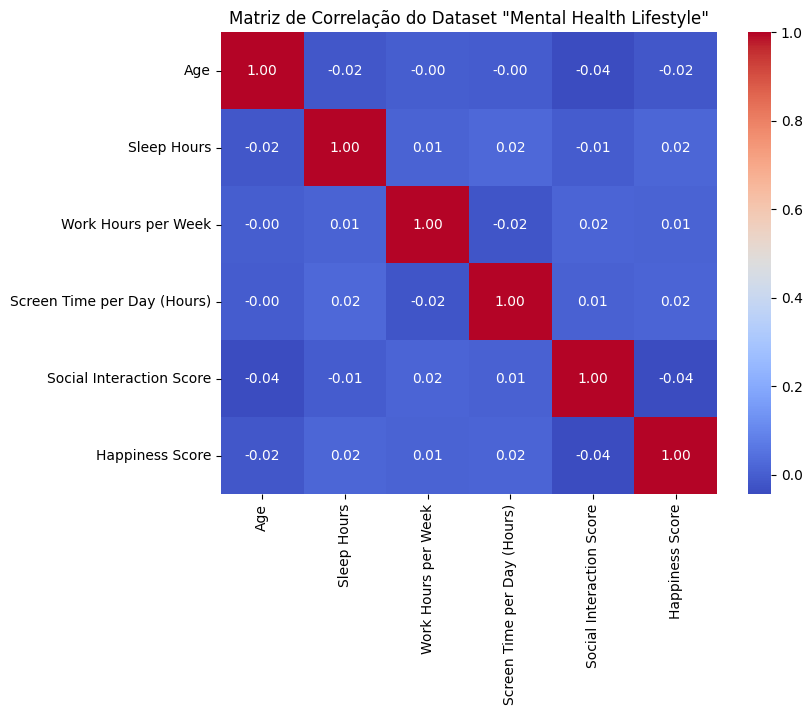

In [59]:
# Mapa de calor das variáveis numéricas df
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:,6:13].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação do Dataset "Mental Health Lifestyle"')
plt.show()

*Comentários Matriz de Correlação:*


---


> De acordo com o escopo do projeto (correlação entre os atributos que possam explicar determinado por comportamento), foi criada a matriz de correção dos atributos numéricos;

> A matriz mostra que temos correlações fracas (positivas e negativas) entre todas estes atributos numéricos;

> Estas correlações fracas contrariam minha percepção inicial antes da análise dos dados. De maneira superficial, acreditava que teria, por exemplo, uma correlação forte entre 'Horas de Sono' e 'Horas Trabalhadas por Semana';


---



**'Pair plot' sem tratamento dos dados. Utilizado como destaque (hue), o atributo categórico 'Nível de Stress', o que, por ora, é o atributo a ser identificado de acordo com os demais.**

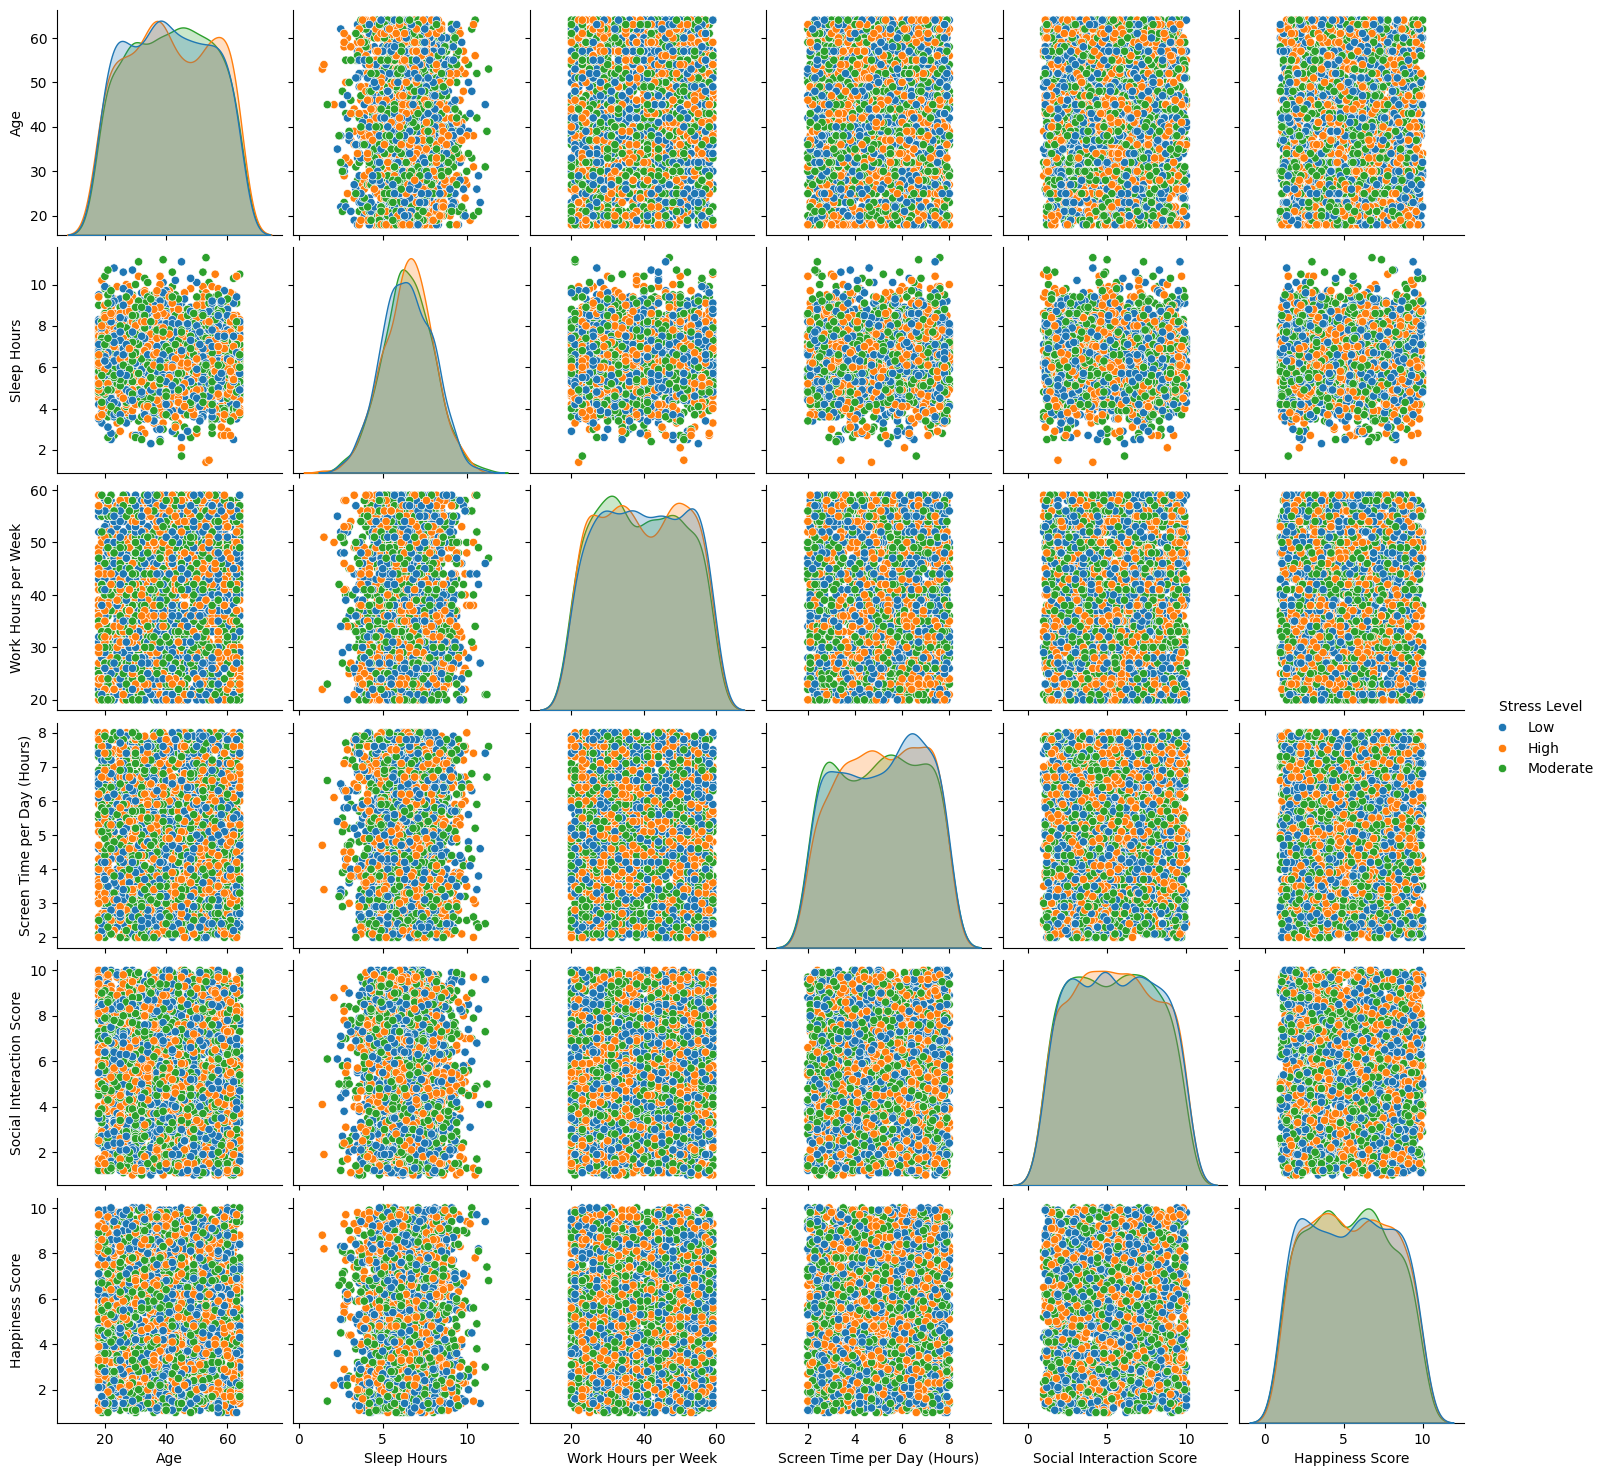

In [60]:
# Pair plot df (Seaborn)
sns.pairplot(df, hue = "Stress Level");

*Comentários Pair plot:*


---


> Também foi criado um gráfico composto (Pair plot) com o objetivo de vermos a dispersão de cada um dos membros do atributo 'Nível de Stress'. O objetivo inicial era encontrar concentrações dos membros de acordo com a cor de cada um nos gráficos. Testes com outros atributos (além de 'Nível de Stress', como 'hue') também foram realizados e também não foram encontradas concentrações.


---

**'Scatterplot' sem tratamento dos dados. Utilizado como destaque (hue), o atriuto categórico 'Nível de Stress', o que, por ora, é o atributo a ser identificado de acordo com os demais**

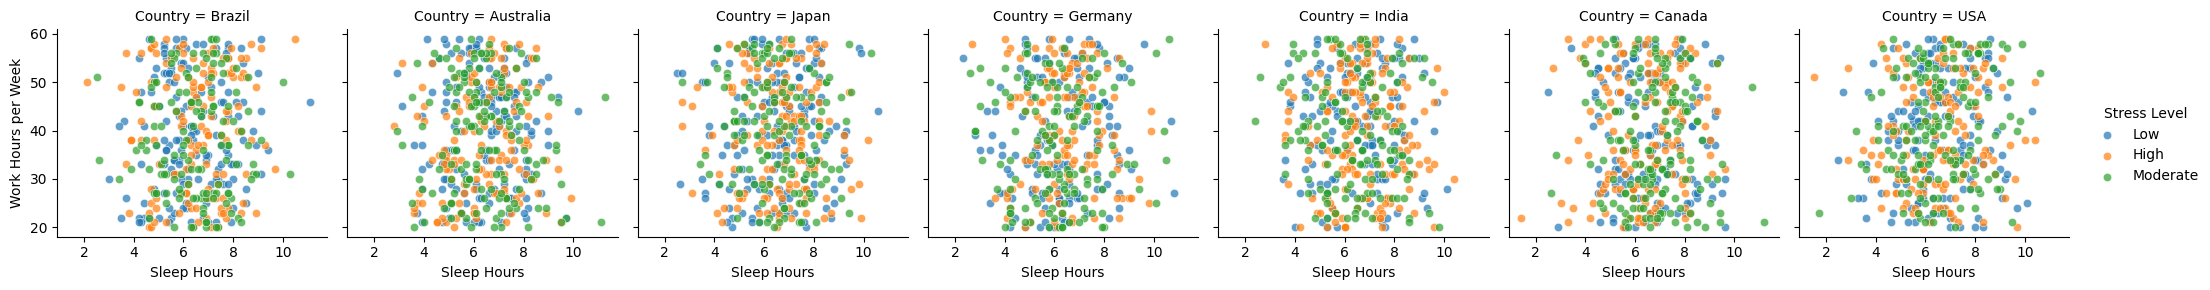

In [87]:
# Horas de Sono  x Horas de Sono por Semana [Países Destacados (Hue)]
g = sns.FacetGrid(df, col="Country", hue="Stress Level")
g.map(sns.scatterplot, "Sleep Hours","Work Hours per Week", alpha=.7)
g.add_legend()

**Horas de Sono  x Horas de Sono por Semana:** De maneira visual, vejo maior dispersão na **Alemanha** e nos **Estados Unidos** para todos os níveis de stess: 'baixos', 'moderados' e 'altos'.

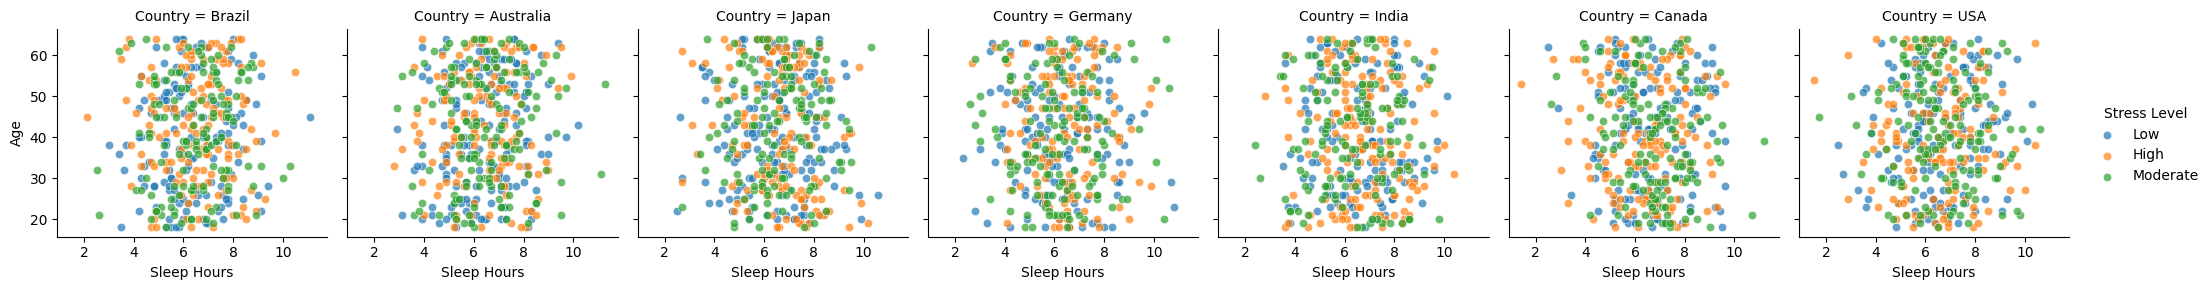

In [108]:
# Horas de Sono x Idade [Países Destacados (Hue)]
g = sns.FacetGrid(df, col="Country", hue="Stress Level")
g.map(sns.scatterplot, "Sleep Hours","Age", alpha=.7)
g.add_legend()

**Horas de Sono x Idade:** De maneira visual, vejo uma maior concentração nos **Estados Unidos** de níveis de stess 'moderados' para horas de sono em torno de 6 horas diárias.

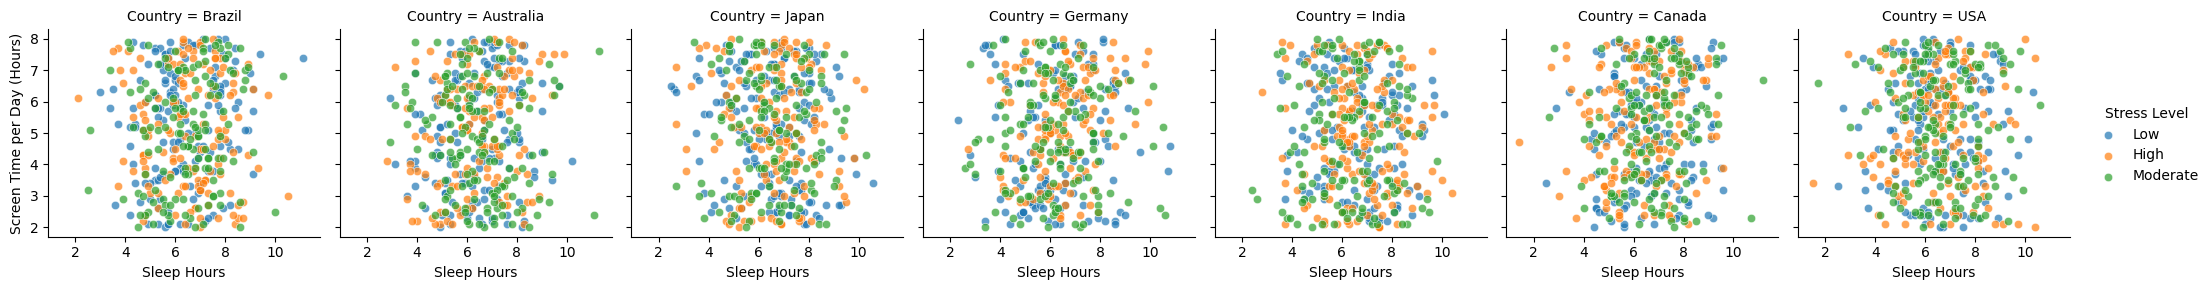

In [104]:
# Horas de Sono x Horas de Tela por Semana [Países Destacados (Hue)]
g = sns.FacetGrid(df, col="Country", hue="Stress Level")
g.map(sns.scatterplot, "Sleep Hours","Screen Time per Day (Hours)", alpha=.7)
g.add_legend()

**Horas de Sono x Horas de Tela por Semana:** De maneira visual, vejo maior dispersão no **Japão** , na **Alemanha** e nos **Estados Unidos** para todos os níveis de stess: 'baixos', 'moderados' e 'altos'.

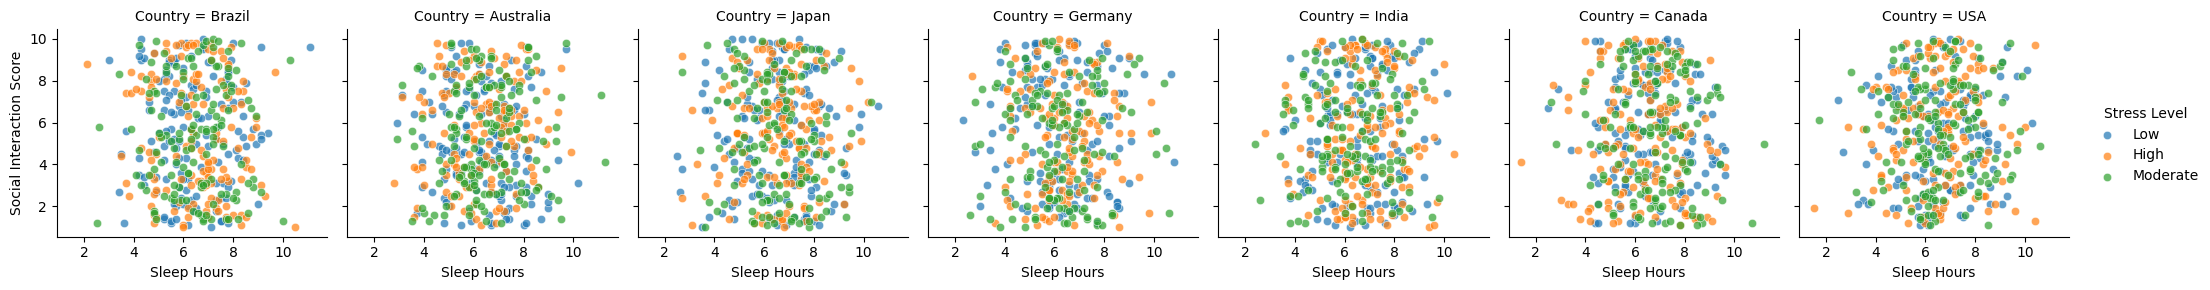

In [105]:
# Horas de Sono x Nível de Interação Social [Países Destacados (Hue)]
g = sns.FacetGrid(df, col="Country", hue="Stress Level")
g.map(sns.scatterplot, "Sleep Hours","Social Interaction Score", alpha=.7)
g.add_legend()

**Horas de Sono x Nível de Interação Social:** De maneira visual, vejo uma maior concentração nos **Estados Unidos** de níveis de stess 'moderados' para horas de sono em torno de 6 horas diárias.

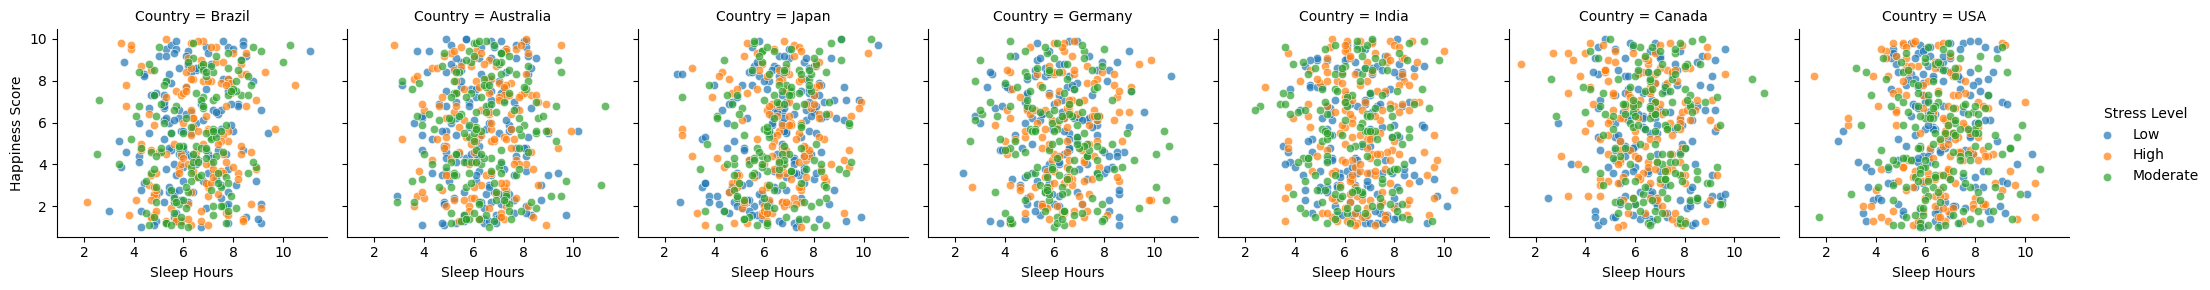

In [106]:
# Horas de Sono x Score de Felicidade [Países Destacados (Hue)]
g = sns.FacetGrid(df, col="Country", hue="Stress Level")
g.map(sns.scatterplot, "Sleep Hours","Happiness Score", alpha=.7)
g.add_legend()

**Horas de Sono x Score de Felicidade:** De maneira visual, vejo uma maior concentração nos **Brasil** e uma maior dispersão nos **Estados Unidos** para todos os níveis de stess: 'baixos', 'moderados' e 'altos'.

*Comentários Scatterplot:*


---
> Em complemento ao Pair Plor, a utização de Scatterplot possibilita uma visualização da dispersão dos dados analisando duas variáveis categóricas ao mesmo tempo.
---



# 4. Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

### *4.1. Tratamento de Nulos*

A limpeza consiste na verificação da consistência das informações, correção de possíveis erros de preenchimento ou eliminação de valores desconhecidos, redundantes ou não pertencentes ao domínio.

>**No dataframe 'df', podemos ver abaixo que há 595 instâncias com valores nulos no atributo 'Mental Health Condition'. Analisando o dataset original, as 595 linhas nulas estão com o status de 'None'. Por ser tratar de um estado de desordem mental (Mental Health Condition), tive a dúvida se realmente são informações faltantes ou simplesmente instâncias nas quais o respondente não possuía algum tipo de desordem mental.**

>**Com a impossibilidade de pesquisar essa dúvida, optei por exluir do dataframe o atributo 'Mental Health Condition'.**

>**Dessa forma, foi criado o dataframe 'df_cleaned'.**

In [61]:
# Verificar a presença de valores nulos no dataset df
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


Country                          0
Gender                           0
Exercise Level                   0
Diet Type                        0
Stress Level                     0
Mental Health Condition        595
Age                              0
Sleep Hours                      0
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
dtype: int64

In [62]:
# Criação do novo DataFrame com a limpeza dos dados (exclusão coluna 'Mental Health Condition')
df_cleaned = df.dropna(axis=1, how='any')

As demonstrações do datraframe após a limpeza podem ser vistas nos código que exibem as primeiras (df_cleaned.head) e as últimas (df_cleaned.tail) linhas do dataframe 'df_norm';

In [63]:
# Exibição das primeiras linhas df_cleaned
df_cleaned.head()

Country  Gender Exercise Level   Diet Type Stress Level  Age  \
0     Brazil    Male            Low  Vegetarian          Low   48   
1  Australia    Male       Moderate       Vegan          Low   31   
2      Japan  Female            Low  Vegetarian         High   37   
3     Brazil    Male            Low       Vegan          Low   35   
4    Germany    Male            Low    Balanced          Low   46   

   Sleep Hours  Work Hours per Week  Screen Time per Day (Hours)  \
0          6.3                   21                          4.0   
1          4.9                   48                          5.2   
2          7.2                   43                          4.7   
3          7.2                   43                          2.2   
4          7.3                   35                          3.6   

   Social Interaction Score  Happiness Score  
0                       7.8              6.5  
1                       8.2              6.8  
2                       9.6              9.7  
3                       8.2              6.6  
4                       4.7              4.4

In [64]:
# Exibição das últimas linhas df_cleaned
df_cleaned.tail()

Country  Gender Exercise Level  Diet Type Stress Level  Age  \
2995      Japan  Female       Moderate   Balanced         High   57   
2996  Australia    Male            Low  Junk Food          Low   27   
2997  Australia    Male       Moderate   Balanced         High   42   
2998  Australia    Male           High       Keto          Low   25   
2999      Japan  Female           High      Vegan         High   28   

      Sleep Hours  Work Hours per Week  Screen Time per Day (Hours)  \
2995          7.0                   29                          4.4   
2996          7.1                   47                          7.4   
2997          6.0                   23                          3.9   
2998          5.7                   51                          4.3   
2999          6.9                   41                          6.7   

      Social Interaction Score  Happiness Score  
2995                       9.7              5.9  
2996                       6.3              9.9  
2997                       5.2              4.1  
2998                       5.9              4.1  
2999                       8.3              2.2

Abaixo verificamos que não há mais a presença de nulos no dataframde 'df_cleaned'

In [65]:
# Verificação da presença de valores nulos no dataset df_cleaned
print("Valores nulos no dataset Iris:")
df_cleaned.isnull().sum()

Valores nulos no dataset Iris:


Country                        0
Gender                         0
Exercise Level                 0
Diet Type                      0
Stress Level                   0
Age                            0
Sleep Hours                    0
Work Hours per Week            0
Screen Time per Day (Hours)    0
Social Interaction Score       0
Happiness Score                0
dtype: int64

*Comentários Tratamento de Nulos:*:


---


> Como citado anteriormente, optei pela remoção do atributo categórico 'Mental Health Condition' pela presença de linhas 'None';

> Após a limpeza foi criado o dataframe 'df_cleaned';

---



### *4.2. Separação Treino e Teste*

>**Com o objetivo de trabalhar os dados para futuras análises (outros módulos do curso), os dados foram separações entre treino (70% das instâncias) e teste (30% as instâncias)**

In [66]:
# Separaração features (X) e target (y)
X = df_cleaned.drop('Stress Level', axis=1)
y = df_cleaned['Stress Level']

In [67]:
# Dividisão dos dados em conjuntos de treino e teste (30% de teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Abaixo podemos analisar o resultado do código executado

In [68]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (2100, 10)
Dimensões de X_test: (900, 10)
Dimensões de y_train: (2100,)
Dimensões de y_test: (900,)


### *4.3. Normalização*

A normalização redimensiona os dados de um ou mais atributos do intervalo original para o intervalo de 0 a 1, com o objetivo de alterar os valores para uma escala comum, sem distorcer as diferenças nos intervalos de valores.

>**Foi criado o dataframe 'df_norm', o qual conterá dos dados do dataframe 'df' normalizados. Como estamos em uma etapa de pré-processamento, trabalharemos já com os dados separados (X_train) para treino.**

>**Como o índice não permanece sequencial após a separação do dataframde entre Treino e Teste, foi identificada a necessidade de criar (reordenar) um novo índice para o dataframe 'df_norm'. Esse índice tornou-se necessário para a tópico posterior de '*One Hot Encoding*'.**

In [69]:
# Criação de um novo Dataframe (df_norm), incluindo os atributos normalizados

# recuperando os nomes das colunas
col = list(X_train.columns)

# o novo dataset irá conter todas as colunas do dataset original
df_norm = X_train[col[:]]

scaler = MinMaxScaler()

scaler = scaler.fit(df_norm[['Age']])
df_norm['Age_Norm'] = scaler.transform(df_norm[['Age']])

scaler = scaler.fit(df_norm[['Sleep Hours']])
df_norm['Sleep Hours_Norm'] = scaler.transform(df_norm[['Sleep Hours']])

scaler = scaler.fit(df_norm[['Work Hours per Week']])
df_norm['Work Hours per Week_Norm'] = scaler.transform(df_norm[['Work Hours per Week']])

scaler = scaler.fit(df_norm[['Screen Time per Day (Hours)']])
df_norm['Screen Time per Day (Hours)_Norm'] = scaler.transform(df_norm[['Screen Time per Day (Hours)']])

scaler = scaler.fit(df_norm[['Social Interaction Score']])
df_norm['Social Interaction Score_Norm'] = scaler.transform(df_norm[['Social Interaction Score']])

scaler = scaler.fit(df_norm[['Happiness Score']])
df_norm['Happiness Score_Norm'] = scaler.transform(df_norm[['Happiness Score']])

# remoção das colunas não normalizadas
df_norm.drop(['Age', 'Sleep Hours', 'Work Hours per Week','Screen Time per Day (Hours)','Social Interaction Score','Happiness Score'], axis=1, inplace= True)

# Criação de um novo índice para o df_cleaned (necessário para a etapa posterior do One Hot Encoding)
df_norm = df_norm.reset_index()

In [70]:
# Exibição das primeiras linhas df_norm
df_norm.head()

index    Country  Gender Exercise Level  Diet Type  Age_Norm  \
0   1562    Germany  Female            Low      Vegan  0.804348   
1    804  Australia  Female       Moderate  Junk Food  0.608696   
2    137      India  Female           High      Vegan  0.413043   
3   1681      India   Other       Moderate   Balanced  0.608696   
4     13      Japan   Other            Low      Vegan  0.086957   

   Sleep Hours_Norm  Work Hours per Week_Norm  \
0          0.285714                  0.153846   
1          0.632653                  0.717949   
2          0.500000                  0.076923   
3          0.306122                  0.769231   
4          0.387755                  0.666667   

   Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
0                          0.750000                       0.822222   
1                          0.466667                       0.166667   
2                          0.566667                       0.855556   
3                          0.150000                       0.211111   
4                          0.183333                       0.888889   

   Happiness Score_Norm  
0              0.255556  
1              0.377778  
2              0.200000  
3              0.455556  
4              0.977778

In [71]:
# Exibição das últimas linhas df_norm
df_norm.tail()

index  Country  Gender Exercise Level   Diet Type  Age_Norm  \
2095    257  Germany  Female            Low  Vegetarian  0.934783   
2096    963    Japan  Female       Moderate   Junk Food  0.434783   
2097    625      USA    Male           High        Keto  0.739130   
2098   1022  Germany   Other       Moderate        Keto  0.804348   
2099   2238      USA  Female           High        Keto  0.695652   

      Sleep Hours_Norm  Work Hours per Week_Norm  \
2095          0.193878                  0.128205   
2096          0.653061                  0.717949   
2097          0.663265                  0.820513   
2098          0.479592                  0.153846   
2099          0.704082                  0.974359   

      Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
2095                          0.033333                       0.411111   
2096                          0.900000                       0.644444   
2097                          0.866667                       0.533333   
2098                          0.833333                       0.200000   
2099                          0.066667                       0.277778   

      Happiness Score_Norm  
2095              0.033333  
2096              0.633333  
2097              0.644444  
2098              0.333333  
2099              0.633333

>**Podemos analisar no resumo abaixo que que o dataframe 'df_norm', além de não possuir valores nulos, possui as 2100 instâncias definidades como treino (70% de 3000)**

In [72]:
#Resumo para a análise dos dados após limpeza com o novo índice
print(f"Total de instâncias: {len(df_norm)}")
print("\nTipos de dados por coluna:")
print(df_norm.info())

Total de instâncias: 2100

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             2100 non-null   int64  
 1   Country                           2100 non-null   object 
 2   Gender                            2100 non-null   object 
 3   Exercise Level                    2100 non-null   object 
 4   Diet Type                         2100 non-null   object 
 5   Age_Norm                          2100 non-null   float64
 6   Sleep Hours_Norm                  2100 non-null   float64
 7   Work Hours per Week_Norm          2100 non-null   float64
 8   Screen Time per Day (Hours)_Norm  2100 non-null   float64
 9   Social Interaction Score_Norm     2100 non-null   float64
 10  Happiness Score_Norm              2100 non-null   float64
dtypes: float64(6), 

In [73]:
# Verificar a presença de valores nulos no dataset df_norm
print("Valores nulos no dataset Iris:")
df_norm.isnull().sum()

Valores nulos no dataset Iris:


index                               0
Country                             0
Gender                              0
Exercise Level                      0
Diet Type                           0
Age_Norm                            0
Sleep Hours_Norm                    0
Work Hours per Week_Norm            0
Screen Time per Day (Hours)_Norm    0
Social Interaction Score_Norm       0
Happiness Score_Norm                0
dtype: int64

*Comentários Normalização:*


---


> Foi decidido pela normalização de todos os atributos numéricos do dataframe;

> Com o objetivo de termos somente os atributos normalizados, excluí as colunas não normalizadas;

> As demonstrações do datraframe normalizado podem ser vistas nos código que exibem as primeiras (df_norm.head) e as últimas (df_norm.tail) linhas do dataframe 'df_norm';

> Foi trabalhado o índice do dataframe 'df_norm' com o objetivo de tratar a base da etapa a seguir (*One Hot Enconding*)

---



### *4.4. One Hot Enconding*

O '*One Hot Encoding*' tem o objetivo de transformar os atributos categóricos.

>**Visto que encontrei baixas correlações no dataframe original (df), optei pela utilização do '*One Hot Encoding*' com o objetivo de encontrar novas correlações.**

Abaixo verificamos a aplicação básica do código de '*One Hot Encoding*':

In [74]:
# Exibição dos dados transformados
df_OneHotEnconder_test = OneHotEncoder(sparse_output=False).fit_transform(df_cleaned[['Country','Gender','Exercise Level','Diet Type']])

print("Atributos transformados:")
print(df_OneHotEnconder_test[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]]


>**Para tornar possível a criação de um novo dataframe que contenha os atributos numéricos normalizados e também os atributos categóricos transformados (via '*One Hot Encoding*'), foi necessário seguir os processos do códigos a seguir:**

>>**1. Criação do dodataframde 'df_encoded' com a transformação dos atributos categórigos via '*One Hot Encoding*';**

>>**2. Criaçao do dataframde 'df_final', que é o resultado da junção dos dataframes 'df_norm' e 'df_encoded';**

>>**3. Exclusão dos atributos (df_final.drop) não transformados via '*One Hot Encoding*' com o objetivo de termos no dataframde 'df_final' termos apenas os atributos numéricos normalizados e os atributos categóricos transformados.**

In [75]:
# Tratamento para a criação de um nodo Dataframe (df_final) com os atributos transformados
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df_norm[['Country','Gender','Exercise Level','Diet Type']])

# Criação do df_encoded: criação do Dataframe com os atributos categóricos transformados
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Country','Gender','Exercise Level','Diet Type']))

# Criação do df_final: concatenação de df_cleaned e df_encoded
df_final = pd.concat([df_norm, df_encoded], axis=1)

# remoção das colunas não transformadas
df_final.drop(['index','Country','Gender','Exercise Level','Diet Type'], axis=1, inplace= True)

print(df_final)

      Age_Norm  Sleep Hours_Norm  Work Hours per Week_Norm  \
0     0.804348          0.285714                  0.153846   
1     0.608696          0.632653                  0.717949   
2     0.413043          0.500000                  0.076923   
3     0.608696          0.306122                  0.769231   
4     0.086957          0.387755                  0.666667   
...        ...               ...                       ...   
2095  0.934783          0.193878                  0.128205   
2096  0.434783          0.653061                  0.717949   
2097  0.739130          0.663265                  0.820513   
2098  0.804348          0.479592                  0.153846   
2099  0.695652          0.704082                  0.974359   

      Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
0                             0.750000                       0.822222   
1                             0.466667                       0.166667   
2                             0.5666

As demonstrações do datraframe 'df_final' podem ser vistas nos código que exibem suas primeiras (df_cleaned.head) e últimas (df_final.tail) linhas.

In [76]:
# Exibição das primeiras linhas df_final
df_final.head()

Age_Norm  Sleep Hours_Norm  Work Hours per Week_Norm  \
0  0.804348          0.285714                  0.153846   
1  0.608696          0.632653                  0.717949   
2  0.413043          0.500000                  0.076923   
3  0.608696          0.306122                  0.769231   
4  0.086957          0.387755                  0.666667   

   Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
0                          0.750000                       0.822222   
1                          0.466667                       0.166667   
2                          0.566667                       0.855556   
3                          0.150000                       0.211111   
4                          0.183333                       0.888889   

   Happiness Score_Norm  Country_Australia  Country_Brazil  Country_Canada  \
0              0.255556                0.0             0.0             0.0   
1              0.377778                1.0             0.0             0.0   
2              0.200000                0.0             0.0             0.0   
3              0.455556                0.0             0.0             0.0   
4              0.977778                0.0             0.0             0.0   

   Country_Germany  ...  Gender_Male  Gender_Other  Exercise Level_High  \
0              1.0  ...          0.0           0.0                  0.0   
1              0.0  ...          0.0           0.0                  0.0   
2              0.0  ...          0.0           0.0                  1.0   
3              0.0  ...          0.0           1.0                  0.0   
4              0.0  ...          0.0           1.0                  0.0   

   Exercise Level_Low  Exercise Level_Moderate  Diet Type_Balanced  \
0                 1.0                      0.0                 0.0   
1                 0.0                      1.0                 0.0   
2                 0.0                      0.0                 0.0   
3                 0.0                      1.0                 1.0   
4                 1.0                      0.0                 0.0   

   Diet Type_Junk Food  Diet Type_Keto  Diet Type_Vegan  Diet Type_Vegetarian  
0                  0.0             0.0              1.0                   0.0  
1                  1.0             0.0              0.0                   0.0  
2                  0.0             0.0              1.0                   0.0  
3                  0.0             0.0              0.0                   0.0  
4                  0.0             0.0              1.0                   0.0  

[5 rows x 24 columns]

In [77]:
# Exibição das últimas linhas df_final
df_final.tail()

Age_Norm  Sleep Hours_Norm  Work Hours per Week_Norm  \
2095  0.934783          0.193878                  0.128205   
2096  0.434783          0.653061                  0.717949   
2097  0.739130          0.663265                  0.820513   
2098  0.804348          0.479592                  0.153846   
2099  0.695652          0.704082                  0.974359   

      Screen Time per Day (Hours)_Norm  Social Interaction Score_Norm  \
2095                          0.033333                       0.411111   
2096                          0.900000                       0.644444   
2097                          0.866667                       0.533333   
2098                          0.833333                       0.200000   
2099                          0.066667                       0.277778   

      Happiness Score_Norm  Country_Australia  Country_Brazil  Country_Canada  \
2095              0.033333                0.0             0.0             0.0   
2096              0.633333                0.0             0.0             0.0   
2097              0.644444                0.0             0.0             0.0   
2098              0.333333                0.0             0.0             0.0   
2099              0.633333                0.0             0.0             0.0   

      Country_Germany  ...  Gender_Male  Gender_Other  Exercise Level_High  \
2095              1.0  ...          0.0           0.0                  0.0   
2096              0.0  ...          0.0           0.0                  0.0   
2097              0.0  ...          1.0           0.0                  1.0   
2098              1.0  ...          0.0           1.0                  0.0   
2099              0.0  ...          0.0           0.0                  1.0   

      Exercise Level_Low  Exercise Level_Moderate  Diet Type_Balanced  \
2095                 1.0                      0.0                 0.0   
2096                 0.0                      1.0                 0.0   
2097                 0.0                      0.0                 0.0   
2098                 0.0                      1.0                 0.0   
2099                 0.0                      0.0                 0.0   

      Diet Type_Junk Food  Diet Type_Keto  Diet Type_Vegan  \
2095                  0.0             0.0              0.0   
2096                  1.0             0.0              0.0   
2097                  0.0             1.0              0.0   
2098                  0.0             1.0              0.0   
2099                  0.0             1.0              0.0   

      Diet Type_Vegetarian  
2095                   1.0  
2096                   0.0  
2097                   0.0  
2098                   0.0  
2099                   0.0  

[5 rows x 24 columns]

In [78]:
#Resumo para a análise dos dados do 'df_final'
print(f"Total de instâncias: {len(df_final)}")
print("\nTipos de dados por coluna:")
print(df_final.info())

Total de instâncias: 2100

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age_Norm                          2100 non-null   float64
 1   Sleep Hours_Norm                  2100 non-null   float64
 2   Work Hours per Week_Norm          2100 non-null   float64
 3   Screen Time per Day (Hours)_Norm  2100 non-null   float64
 4   Social Interaction Score_Norm     2100 non-null   float64
 5   Happiness Score_Norm              2100 non-null   float64
 6   Country_Australia                 2100 non-null   float64
 7   Country_Brazil                    2100 non-null   float64
 8   Country_Canada                    2100 non-null   float64
 9   Country_Germany                   2100 non-null   float64
 10  Country_India                     2100 non-null   float64
 11  Country_Japan  

In [79]:
# Verificar a presença de valores nulos no dataset 'df_final'
print("Valores nulos no dataset Iris:")
df_final.isnull().sum()

Valores nulos no dataset Iris:


Age_Norm                            0
Sleep Hours_Norm                    0
Work Hours per Week_Norm            0
Screen Time per Day (Hours)_Norm    0
Social Interaction Score_Norm       0
Happiness Score_Norm                0
Country_Australia                   0
Country_Brazil                      0
Country_Canada                      0
Country_Germany                     0
Country_India                       0
Country_Japan                       0
Country_USA                         0
Gender_Female                       0
Gender_Male                         0
Gender_Other                        0
Exercise Level_High                 0
Exercise Level_Low                  0
Exercise Level_Moderate             0
Diet Type_Balanced                  0
Diet Type_Junk Food                 0
Diet Type_Keto                      0
Diet Type_Vegan                     0
Diet Type_Vegetarian                0
dtype: int64

*Comentários One Hot Enconding:*


---


>* A criação do dafaframe 'df_final' teve o objetivo de transformar os atributos categóricos para encontrar novas correlações. A motivação foram a correlações fracas encontradas no dataframe inicial (df);

>* Como citado anteriormente, o dataframe 'df_final' é uma concatenação do 'df_norm' com o 'df_encoded';

>* O dataframe 'df_final' será a base para a próxima etapa (Análises Pós Processamento de Dados)

---

### *4.5. Análises Pré Processamento dos Dados*

A ideia da análise após o pré processamento dos dados, é encontrar correlações no dataframe 'df_final'.

**'df_final':** atributos numéricos normalizados do 'df_norm' concatenados com os atributos categóricos transformados (One Hot Enconding) do 'df_cleaned'

>**Visto que encontrei baixas correlações no dataframde original (df), optei pela utilização do '*One Hot Encoding*' com o objetivo de encontrar novas correlações.**

*Observações Iniciais Matriz de Correlação após Pré Processamento dos Dados*

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [80]:
# Matriz de correlação df_final
print("\nMatriz de Correlação:")
df_final.corr()


Matriz de Correlação:


Age_Norm  Sleep Hours_Norm  \
Age_Norm                          1.000000         -0.027304   
Sleep Hours_Norm                 -0.027304          1.000000   
Work Hours per Week_Norm         -0.012664          0.025410   
Screen Time per Day (Hours)_Norm -0.007661          0.028033   
Social Interaction Score_Norm    -0.062108          0.002373   
Happiness Score_Norm             -0.022151          0.026869   
Country_Australia                -0.002522         -0.022110   
Country_Brazil                   -0.000264         -0.005960   
Country_Canada                   -0.029761          0.023503   
Country_Germany                  -0.007431         -0.027486   
Country_India                     0.011753          0.002016   
Country_Japan                     0.013989          0.017419   
Country_USA                       0.014084          0.012193   
Gender_Female                    -0.032190         -0.003871   
Gender_Male                       0.037337          0.000514   
Gender_Other                     -0.004799          0.003348   
Exercise Level_High               0.000962         -0.000653   
Exercise Level_Low               -0.013254         -0.005493   
Exercise Level_Moderate           0.012541          0.006231   
Diet Type_Balanced               -0.001853         -0.041630   
Diet Type_Junk Food               0.006145          0.031600   
Diet Type_Keto                   -0.003707          0.008349   
Diet Type_Vegan                  -0.001403         -0.021574   
Diet Type_Vegetarian              0.000625          0.022322   

                                  Work Hours per Week_Norm  \
Age_Norm                                         -0.012664   
Sleep Hours_Norm                                  0.025410   
Work Hours per Week_Norm                          1.000000   
Screen Time per Day (Hours)_Norm                 -0.000176   
Social Interaction Score_Norm                     0.004289   
Happiness Score_Norm                              0.007486   
Country_Australia                                -0.014643   
Country_Brazil                                   -0.005635   
Country_Canada                                   -0.001856   
Country_Germany                                  -0.024355   
Country_India                                     0.019403   
Country_Japan                                     0.007131   
Country_USA                                       0.019610   
Gender_Female                                    -0.013840   
Gender_Male                                       0.017031   
Gender_Other                                     -0.003028   
Exercise Level_High                              -0.045292   
Exercise Level_Low                                0.013438   
Exercise Level_Moderate                           0.030848   
Diet Type_Balanced                               -0.000500   
Diet Type_Junk Food                               0.015724   
Diet Type_Keto                                    0.007419   
Diet Type_Vegan                                  -0.012686   
Diet Type_Vegetarian                             -0.010463   

                                  Screen Time per Day (Hours)_Norm  \
Age_Norm                                                 -0.007661   
Sleep Hours_Norm                                          0.028033   
Work Hours per Week_Norm                                 -0.000176   
Screen Time per Day (Hours)_Norm                          1.000000   
Social Interaction Score_Norm                             0.007588   
Happiness Score_Norm                                      0.026434   
Country_Australia                                         0.018499   
Country_Brazil                                            0.009557   
Country_Canada                                            0.033930   
Country_Germany                                          -0.026825   
Country_India                                            -0.052562   
Country_Japan                             

**Mapa de calor da matriz de correlação após Pré Processamento dos Dados**

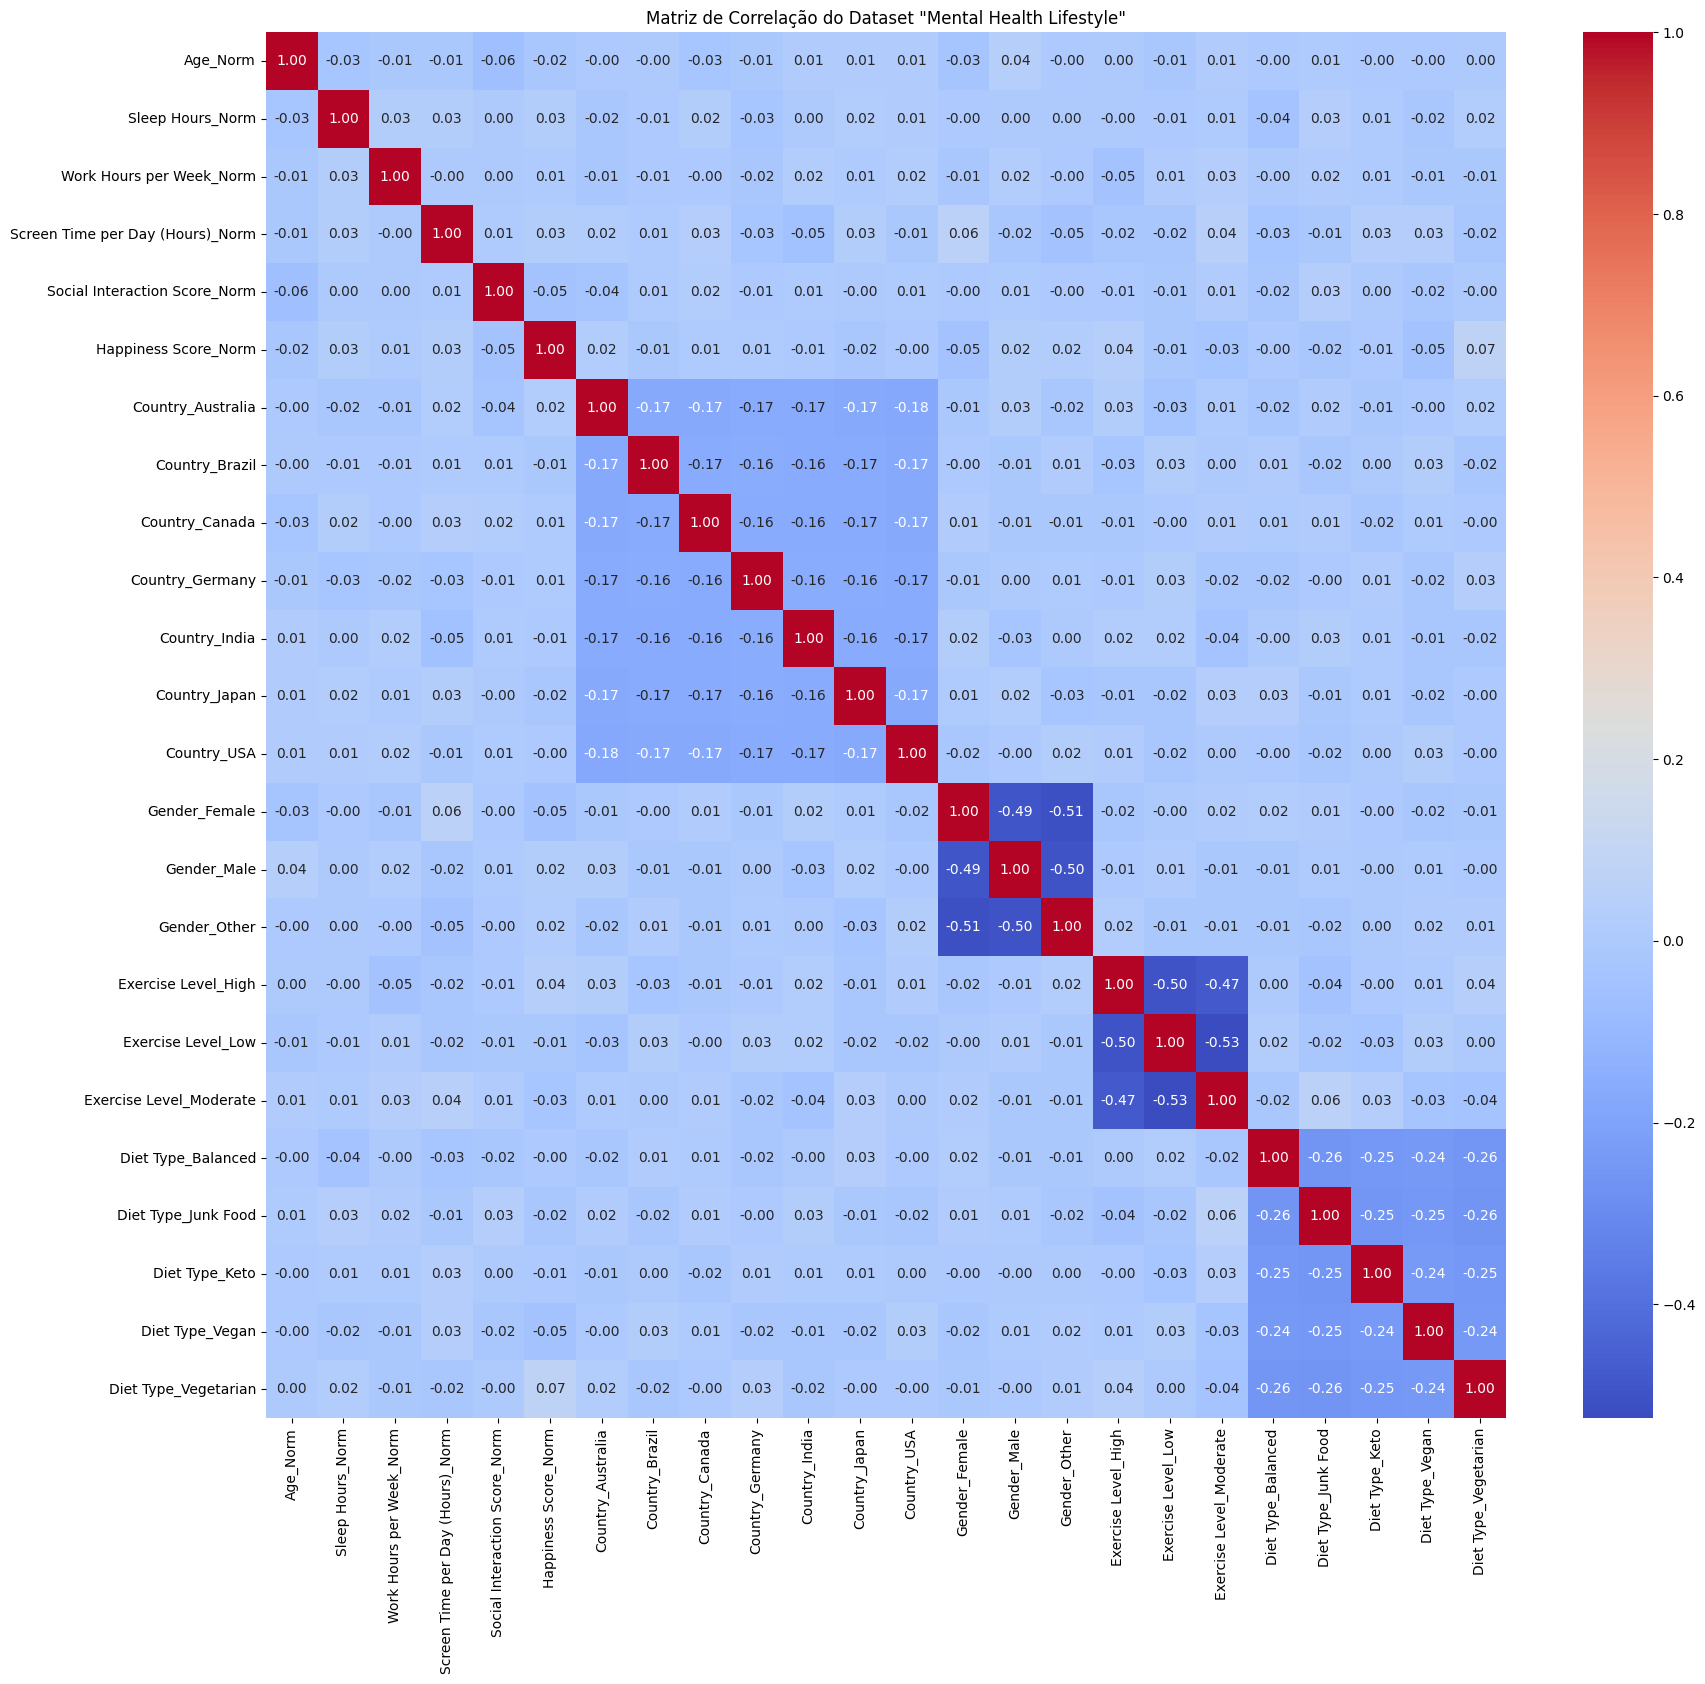

In [81]:
# Mapa de calor das variáveis numéricas df_final
plt.figure(figsize=(20, 18))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação do Dataset "Mental Health Lifestyle"')
plt.show()

*Comentários Matriz de Correlação Pós Pré Processamento dos Dados:*


---


> De acordo com o escopo do projeto (correlação entre os atributos que possam explicar determinado por comportamento), foi criada a matriz de correção dos atributos numéricos;

> Como houve correlações fracas antes do tratamento dos dados, realizei a normalização dos atributos numéricos e também a transformação dos atributos categóricos, via One Hot Encoding, com o intuito de encontrar novas correlações;

> A matriz de calor Pós Processamento dos Dados, mostra que continuamos com correlações fracas (positivas e negativas) entre todos estes atributos;

> Estas correlações fracas contrariam minha percepção inicial antes da análise dos dados. De maneira superficial, acreditava que teria, por exemplo, uma correlação forte entre 'Horas de Sono' e 'Horas Trabalhadas por Semana';

---

# 5. Conclusão

O resultado de todas as análises exploratórias e o pré-processamento do dataset 'Mental Health Lifestyle' foi essencial para um entendimento dos dados como um todo antes do desenvolvimento de qualquer modelo de Machine Learning.

Trata-se de um dataset balanceado no que diz respeito às suas variáveis categóricas.

Como o dataset possui originalmente 5 atributos categóricos, selecionei inicialmente o atributo **níveis de stress** com o objetivo de dintingui-lo estudando os demais atributos.

Trata-se de um dataset com apenas um atributo (Mental Health Condition) com valores nulos. Como descrito na etapa de limpeza de dados (4.3. Tratamento de Nulos), optei por limpar estes dados (toda a coluna), mesmo entendendo que existia a possibilidade de os valores 'None' serem de respondentes que não possuiam algum tipo de 'Mental Health Condition'.





---



Hipóteses e Premissas levantadas:

**1. Podemos segregar/distinguir os diferentes níveis de stress e bem-estar de acordo com as aferições de horas de sono, horas de trabalho e horas em telas diários, por exemplo?**

>De acordo com as análises pré e pós processamento dos dados, até o momento, não tenho conclusões que possam afirmar esta questão. Foram realizadas aferições por meio de análises de gráficos de dispersão, Boxplots e mapa de calor das correlações.

**2. Existe alguma correlação entre os atributos numéricos (exemplo: horas de sonos e horas trabalhadas)?**

>De acordo com o mapa de calor das correlações pré processamento, as correlação calculadas foram consideradas fracas. Com o objetivo de um aprofundamento, realizaei o One Hot Enconding dos atributos categórigos e também a normalização dos atributos numéricos. Mesmo assim, todas as correlações foram consideradas fracas após o Pré Processamento dos Dados.

**3. Há algum padrão facilmente de ser identificado apenas com uma análise gráfica?**

>Para minha frustração inicial, não. Os atributos categóricos estão balanceados, mas em análises de dispersão, sem concetrações quando comparo os atributos.

**4. Premissas: De maneira empírica, pela natureza dos atributos do dataset original, creio que há uma correlação forte entre alguns desses atributos (exemplos: horas de sono vs horas trabalhadas / horas de sono vs horas de tela).**

>Premissa contrariada. Não encontrei essas correlações fortes que empiricamente acreditava que existiriam. Mesmo com uma análise envolvendo os atritutos categóricos (One Hot Enconding), permanecemos com a ausência de correlações fortes.


---

>Mesmo sem encontrar os resultados esperados na análise exploratória dos dados (antes e depois do Pré Processamento), acredito que o dataset seja interessantes para outros tipos de estudos. Outras técnicas, como por exemplo 'Feature Engineering' creio que mudem minha percepção inicial em relação ao dataset.
